# Importing the libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import missingno as msno
import warnings 
warnings.filterwarnings('ignore')

# Importing dataset

In [63]:
diabetes_df = pd.read_csv('diabetes.csv')

diabetes_df.shape

(768, 9)

In [64]:
diabetes_df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [65]:
diabetes_df.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
70             2      100             66             20       90  32.9   
521            3      124             80             33      130  33.2   
647            0      179             50             36      159  37.8   
572            3      111             58             31       44  29.5   
102            0      125             96              0        0  22.5   

     DiabetesPedigreeFunction  Age  Outcome  
70                      0.867   28        1  
521                     0.305   26        0  
647                     0.455   22        1  
572                     0.430   22        0  
102                     0.262   21        0

- **Pregnancies** Number of times pregnant
- **Glucose**: A normal fasting blood glucose level is lower than 95 mg/dL (5.3 mmol/L). One hour after drinking the glucose solution, a normal blood glucose level is lower than 180 mg/dL (10 mmol/L). Two hours after drinking the glucose solution, a normal blood glucose level is lower than 155 mg/dL (8.6 mmol/L)
- **BloodPressure** diastolic pressure (the bottom number) is the pressure of the blood in your arteries between beats, when your heart relaxes,normal range is 80 and below
- **SkinThickness** The average TSF thickness was 18.7 ± 8.5 mm. Women have much higher TSF thickness than men (23.6 ± 7.5 mm vs 14.3 ± 6.8 mm). The mean BMI, MAMC, and MUAC were 27.6 ± 3.4 kg/m2, 18.7 ± 8.5 mm, 26.4 ± 4.1 cm, and 32.3 ± 4.6 cm, respectively
- **Insulin** Before a meal: 80 to 130 mg/dL. Two hours after the start of a meal: Less than 180 mg/dL
- **BMI** Body mass index, normal range 18.5 to 24.9
- **Diabetes Pedigree Function** indicates the function which scores likelihood of diabetes based on family history

# Data Exploration:
1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
- Glucose
- BloodPressure
- SkinThickness
- Insulin
- BMI

In [66]:
# observing a quick description about the dataset

diabetes_df.describe(include='all')

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

As we observe,there are **0** values in the **min** row, most columns we have missing values in our dataset, and we will check if there are any NaN values in our dataset

In [67]:
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [68]:
diabetes_df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [69]:
print(diabetes_df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


<AxesSubplot:>

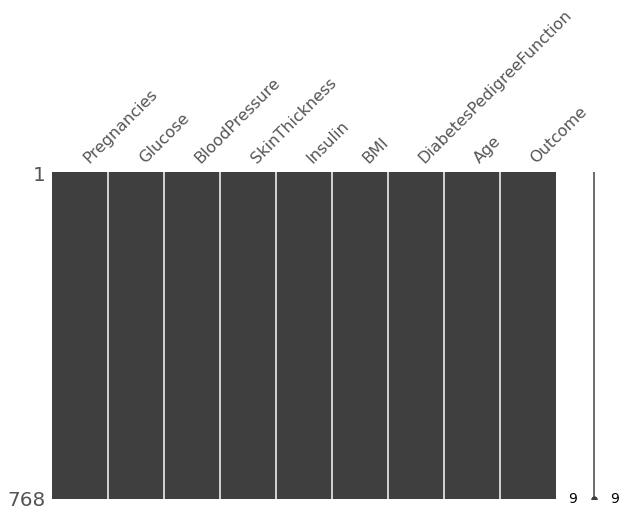

In [70]:
msno.matrix(df=diabetes_df, figsize=(10,6))

There are no **NaN** values in the dataset

Creating a new dataframe which contains the columns in which zero values are missing values

In [71]:
zero_values_columns = diabetes_df.iloc[:,1:7]
zero_values_columns.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      148             72             35        0  33.6   
1       85             66             29        0  26.6   
2      183             64              0        0  23.3   
3       89             66             23       94  28.1   
4      137             40             35      168  43.1   

   DiabetesPedigreeFunction  
0                     0.627  
1                     0.351  
2                     0.672  
3                     0.167  
4                     2.288

### Visually explore these variables using histograms. Treat the missing values accordingly

In [72]:
# Creating a function to get the percentage of missing values in the columns

def missing_per(var):
    print('Percentage: ', round((zero_values_columns[zero_values_columns[var] == 0])/ 
                                (zero_values_columns.shape[0])*100, ndigits=2))
    print('No. of missing values: ', zero_values_columns[zero_values_columns[var]
                                                         == 0].shape[0],'\n')

Percentage:       Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75       0.0           6.25           2.60     0.00  3.22   
182      0.0           9.64           2.60     2.99  3.61   
342      0.0           8.85           4.56     0.00  4.17   
349      0.0          10.42           4.17     0.00  5.34   
502      0.0           8.85           5.34     0.00  5.08   

     DiabetesPedigreeFunction  
75                       0.02  
182                      0.04  
342                      0.05  
349                      0.05  
502                      0.09  
No. of missing values:  5 



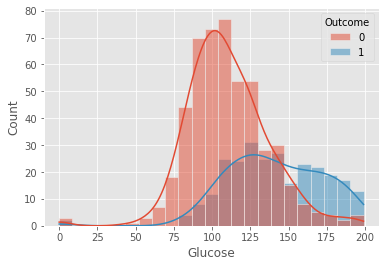

In [73]:
import seaborn as sns

sns.histplot(x='Glucose', data=zero_values_columns, kde=True,
             hue=diabetes_df['Outcome'])
missing_per('Glucose')

Percentage:       Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7      14.97            0.0           0.00      0.0  4.60   
15     13.02            0.0           0.00      0.0  3.91   
49     13.67            0.0           0.00      0.0  0.00   
60     10.94            0.0           0.00      0.0  0.00   
78     17.06            0.0           0.00      0.0  5.62   
81      9.64            0.0           0.00      0.0  0.00   
172    11.33            0.0           2.99      0.0  3.76   
193    17.58            0.0           0.00      0.0  6.81   
222    15.49            0.0           0.00      0.0  3.28   
261    18.36            0.0           0.00      0.0  3.91   
266    17.97            0.0           0.00      0.0  4.73   
269    19.01            0.0           0.00      0.0  3.58   
300    21.74            0.0           0.00      0.0  4.21   
332    23.44            0.0           0.00      0.0  5.64   
336    15.23            0.0           0.00      0.0  4.40   
347    15.1

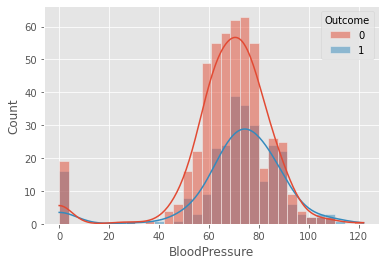

In [74]:
sns.histplot(x='BloodPressure', data=zero_values_columns,
            kde=True, hue=diabetes_df['Outcome'], color='green')
missing_per('BloodPressure')

Percentage:       Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2      23.83           8.33            0.0      0.0  3.03   
5      15.10           9.64            0.0      0.0  3.33   
7      14.97           0.00            0.0      0.0  4.60   
9      16.28          12.50            0.0      0.0  0.00   
10     14.32          11.98            0.0      0.0  4.90   
..       ...            ...            ...      ...   ...   
757    16.02           9.38            0.0      0.0  4.73   
758    13.80           9.90            0.0      0.0  4.88   
759    24.74          11.98            0.0      0.0  4.62   
762    11.59           8.07            0.0      0.0  2.93   
766    16.41           7.81            0.0      0.0  3.92   

     DiabetesPedigreeFunction  
2                        0.09  
5                        0.03  
7                        0.02  
9                        0.03  
10                       0.02  
..                        ...  
757                      0.03 

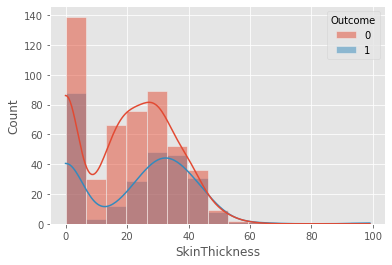

In [75]:
sns.histplot(x='SkinThickness', data=zero_values_columns,
            kde=True, color='k', hue=diabetes_df['Outcome'])
missing_per('SkinThickness')

Percentage:       Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0      19.27           9.38           4.56      0.0  4.38   
1      11.07           8.59           3.78      0.0  3.46   
2      23.83           8.33           0.00      0.0  3.03   
5      15.10           9.64           0.00      0.0  3.33   
7      14.97           0.00           0.00      0.0  4.60   
..       ...            ...            ...      ...   ...   
761    22.14           9.64           4.04      0.0  5.73   
762    11.59           8.07           0.00      0.0  2.93   
764    15.89           9.11           3.52      0.0  4.79   
766    16.41           7.81           0.00      0.0  3.92   
767    12.11           9.11           4.04      0.0  3.96   

     DiabetesPedigreeFunction  
0                        0.08  
1                        0.05  
2                        0.09  
5                        0.03  
7                        0.02  
..                        ...  
761                      0.05 

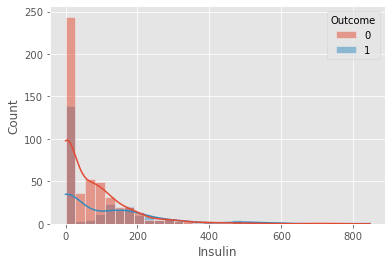

In [76]:
sns.histplot(x='Insulin',data=zero_values_columns,
            kde=True, color='purple', hue=diabetes_df['Outcome'])
missing_per('Insulin')

Percentage:       Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9      16.28          12.50           0.00     0.00  0.0   
49     13.67           0.00           0.00     0.00  0.0   
60     10.94           0.00           0.00     0.00  0.0   
81      9.64           0.00           0.00     0.00  0.0   
145    13.28           9.77           2.99     0.00  0.0   
371    15.36           8.33           2.99    11.59  0.0   
426    12.24           0.00           0.00     0.00  0.0   
494    10.42           0.00           0.00     0.00  0.0   
522    14.84           0.00           0.00     0.00  0.0   
684    17.71          10.68           0.00     0.00  0.0   
706    14.97           0.00           0.00     0.00  0.0   

     DiabetesPedigreeFunction  
9                        0.03  
49                       0.04  
60                       0.04  
81                       0.01  
145                      0.07  
371                      0.23  
426                      0.03  
494       

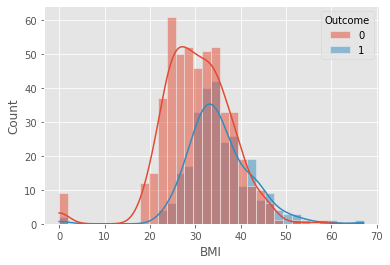

In [77]:
sns.histplot(x='BMI',data=zero_values_columns,kde=True,color='darkgreen',hue=diabetes_df['Outcome'])
missing_per('BMI')

### Understanding the invalid values

<AxesSubplot:>

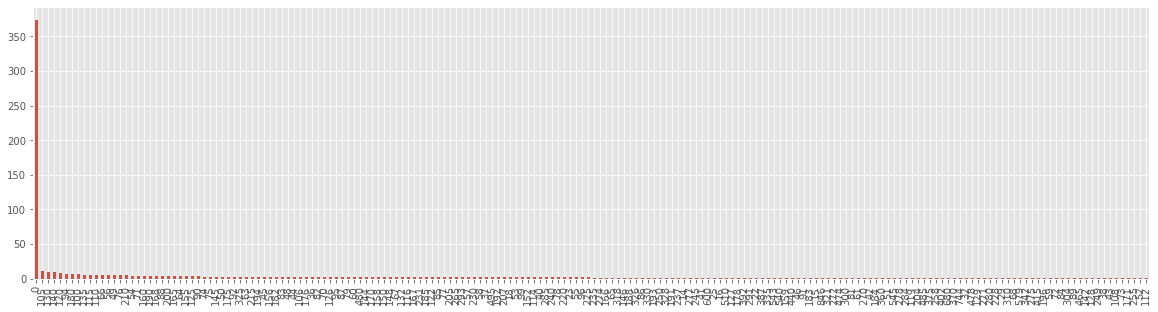

In [78]:
plt.figure(figsize=(20,5))
diabetes_df['Insulin'].value_counts().plot(kind='bar')

# Original vs Treated variables

In [79]:
diabetes_df['Glucose'].replace(0, 117, inplace=True)
diabetes_df['Glucose'] = np.log1p(diabetes_df['Glucose'])

<AxesSubplot:title={'center':'Treated'}, xlabel='Glucose', ylabel='Count'>

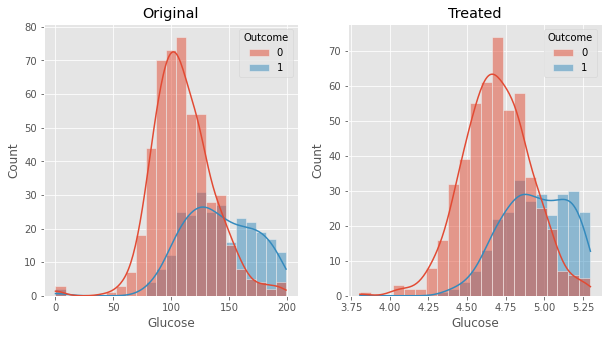

In [80]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
sns.histplot(x='Glucose',data=zero_values_columns,kde=True,hue=diabetes_df['Outcome'])
plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='Glucose',kde=True,data=diabetes_df,hue='Outcome')

In [81]:
diabetes_df['BloodPressure'].replace(0, 60, inplace=True)
#diabetes_df['BloodPressure'] = np.log1p(diabetes_df['BloodPressure'])

<AxesSubplot:title={'center':'Treated'}, xlabel='BloodPressure', ylabel='Count'>

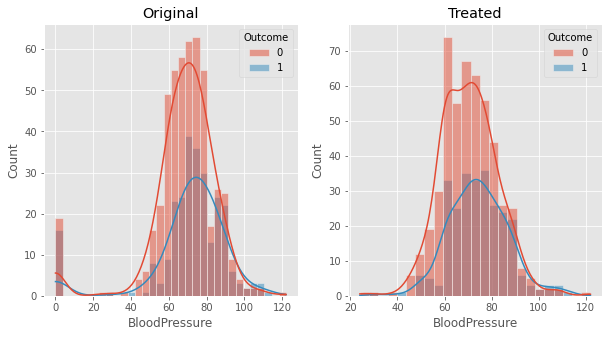

In [82]:
#diabetes_df['BloodPressure'].replace(0, 60, inplace=True)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original')
sns.histplot(x='BloodPressure', data=zero_values_columns,
            kde=True, hue=diabetes_df['Outcome'])

plt.subplot(1, 2, 2)
plt.title('Treated')
sns.histplot(x='BloodPressure', data=diabetes_df,
            kde=True, hue=diabetes_df['Outcome'])

Converting **0** values to **NaN** values and filling them by ffill(frontfill) method/ bfill(backfill) method

In [83]:
diabetes_df['SkinThickness'].replace(0,np.nan, inplace=True)
diabetes_df['SkinThickness'].fillna(method='ffill', inplace=True)
diabetes_df['SkinThickness'] = np.log1p(diabetes_df['SkinThickness'])

<AxesSubplot:title={'center':'Treated'}, xlabel='SkinThickness', ylabel='Count'>

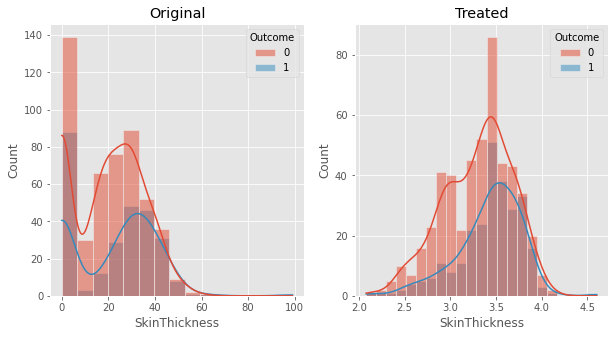

In [84]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original')
sns.histplot(x='SkinThickness', data=zero_values_columns,
            kde=True, hue=diabetes_df['Outcome'])

plt.subplot(1, 2, 2)
plt.title('Treated')
sns.histplot(x='SkinThickness', data=diabetes_df,
            kde=True, hue=diabetes_df['Outcome'])

In [85]:
diabetes_df['SkinThickness'].sort_values()

519    2.079442
254    2.079442
382    2.197225
435    2.197225
434    2.197225
         ...   
120    4.043051
57     4.110874
58     4.110874
445    4.158883
579    4.605170
Name: SkinThickness, Length: 768, dtype: float64

In [86]:
diabetes_df['Insulin'] = np.log1p(diabetes_df['Insulin'])

<AxesSubplot:title={'center':'Original'}, xlabel='Insulin', ylabel='Count'>

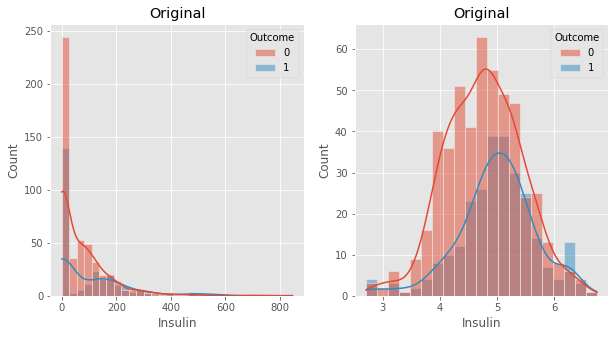

In [87]:
diabetes_df['Insulin'].replace(0, np.nan, inplace=True)
diabetes_df['Insulin'].fillna(method='ffill', inplace=True)
diabetes_df['Insulin'].fillna(method='bfill', inplace=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
sns.histplot(x='Insulin', data=zero_values_columns,
            kde=True, hue=diabetes_df['Outcome'])

plt.subplot(1, 2, 2)
plt.title('Original')
sns.histplot(x='Insulin', data=diabetes_df, kde=True,
            hue=diabetes_df['Outcome'])

In [88]:
diabetes_df['Insulin'].sort_values()

445    2.708050
619    2.772589
617    2.772589
618    2.772589
762    2.833213
         ...   
585    6.398595
584    6.398595
247    6.523562
228    6.613384
13     6.741701
Name: Insulin, Length: 768, dtype: float64

<AxesSubplot:title={'center':'Treated'}, xlabel='BMI', ylabel='Count'>

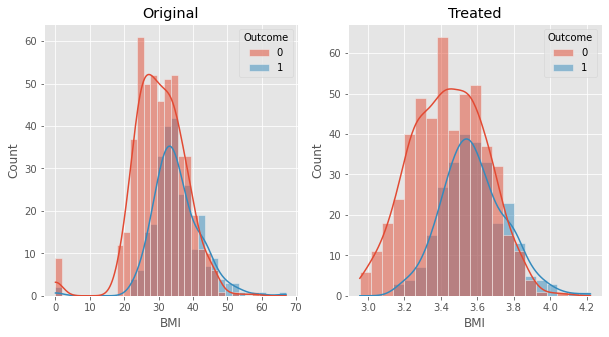

In [89]:
diabetes_df['BMI'].replace(0, 30, inplace=True)
diabetes_df['BMI'] = np.log1p(diabetes_df['BMI'])
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original')
sns.histplot(x='BMI', data=zero_values_columns, kde=True,
            hue=diabetes_df['Outcome'])

plt.subplot(1, 2, 2)
plt.title('Treated')
sns.histplot(x='BMI', data=diabetes_df,
            kde=True, hue=diabetes_df['Outcome'])

<AxesSubplot:title={'center':'Treated'}, xlabel='Age', ylabel='Count'>

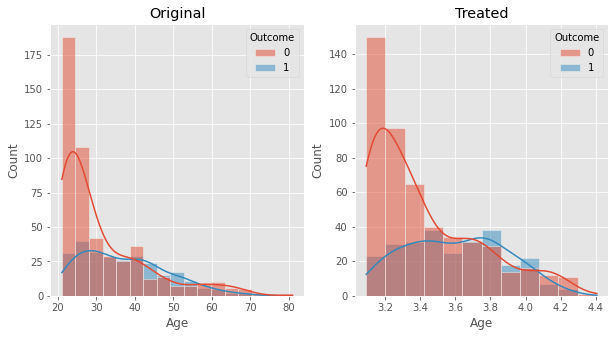

In [90]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original')
sns.histplot(x='Age',data=diabetes_df,kde=True,hue='Outcome')
diabetes_df['Age'] = np.log1p(diabetes_df['Age'])
plt.subplot(1,2,2)
plt.title('Treated')
sns.histplot(x='Age',data=diabetes_df,kde=True,hue='Outcome')

There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables

In [91]:
# Information about the dataset

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


There are **4: float64** datatypes and **5: int64** datatypes in the dataset

Producing **countplot(s)** for the variables to understand the count of attributes in each variable

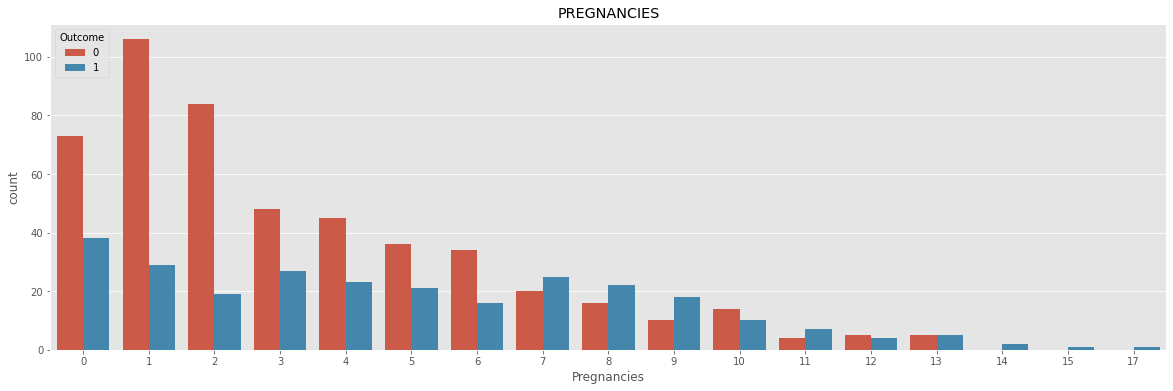

In [92]:
plt.figure(figsize=(20, 6))
sns.countplot(x='Pregnancies', data=diabetes_df,
             hue=diabetes_df['Outcome'])
plt.title('PREGNANCIES')
plt.show()

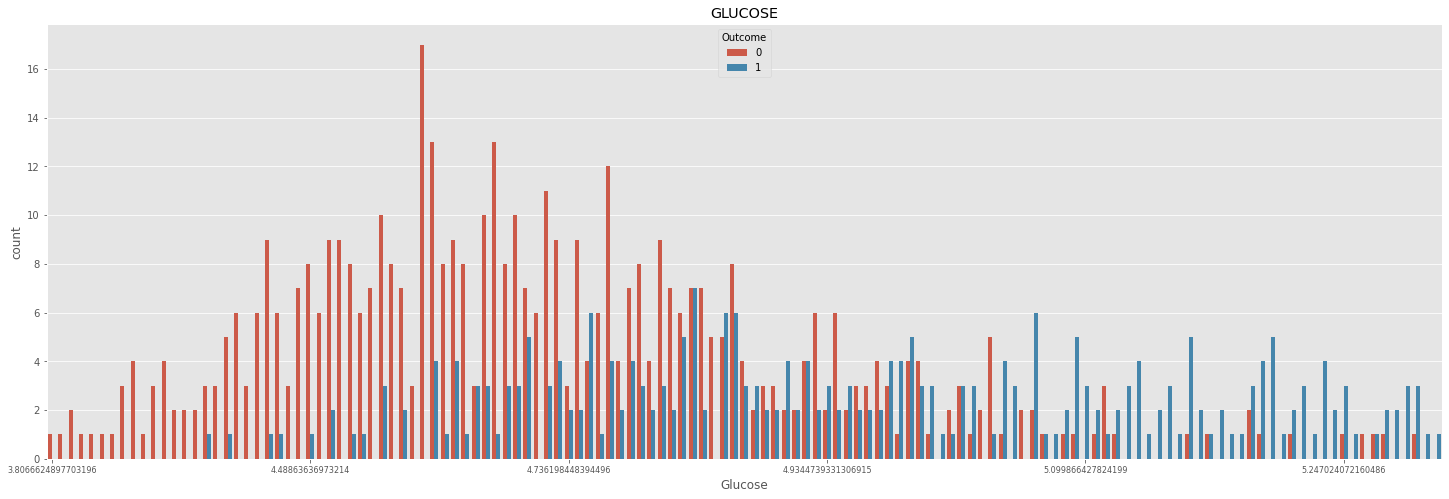

In [93]:
plt.figure(figsize=(25, 8))
sns.countplot(x='Glucose', data=diabetes_df, hue=diabetes_df['Outcome'])
plt.xticks(size=8, ticks=[0, 25, 50, 75, 100, 125])
plt.title('GLUCOSE')
plt.show()

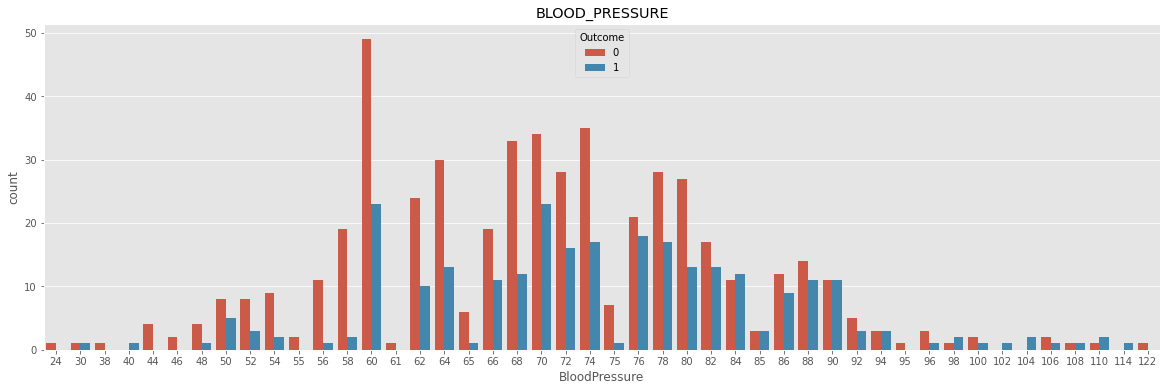

In [94]:
plt.figure(figsize=(20, 6))
sns.countplot(x='BloodPressure', data=diabetes_df, hue='Outcome')
plt.title('BLOOD_PRESSURE')
plt.show()

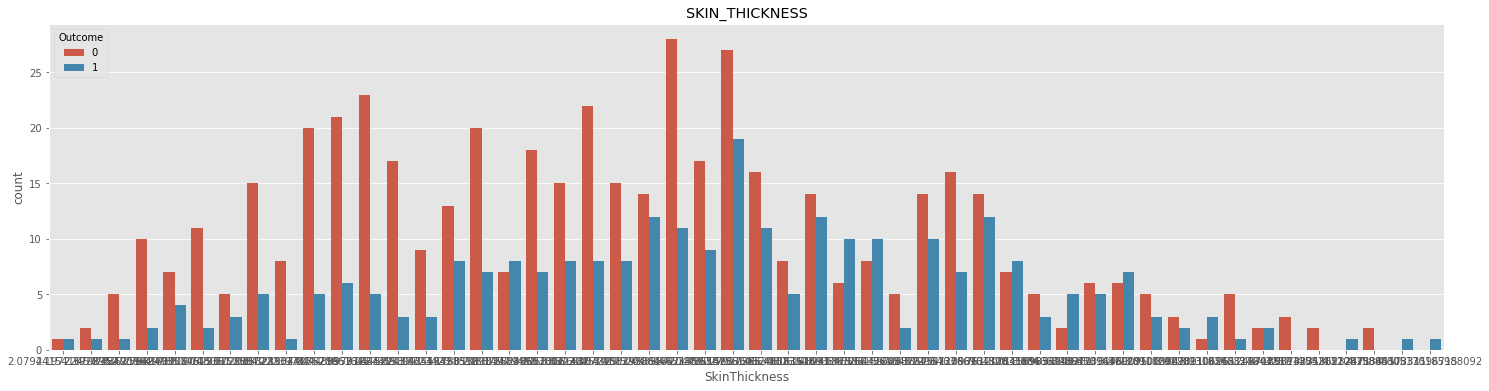

In [95]:
plt.figure(figsize=(25, 6))
sns.countplot(x='SkinThickness', data=diabetes_df, hue='Outcome')
plt.title('SKIN_THICKNESS')
plt.show()

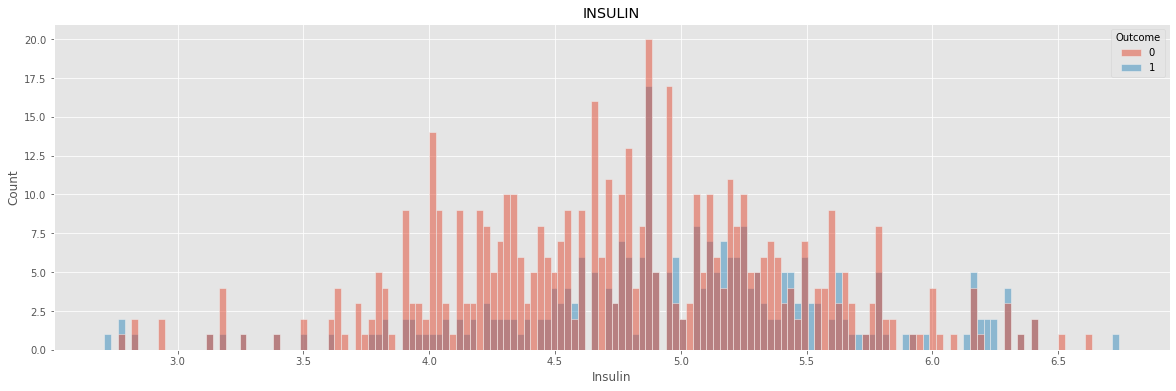

In [96]:
plt.figure(figsize=(20,6))
sns.histplot(x='Insulin',data=diabetes_df,bins=150,hue='Outcome')
plt.title('INSULIN')
plt.show()

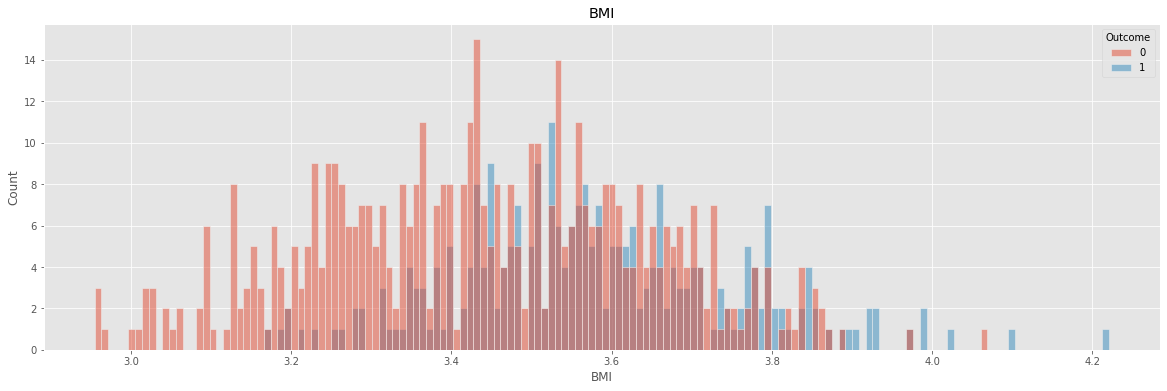

In [97]:
plt.figure(figsize=(20,6))
sns.histplot(data=diabetes_df,x='BMI',bins=150,hue='Outcome')
plt.title('BMI')
plt.show()

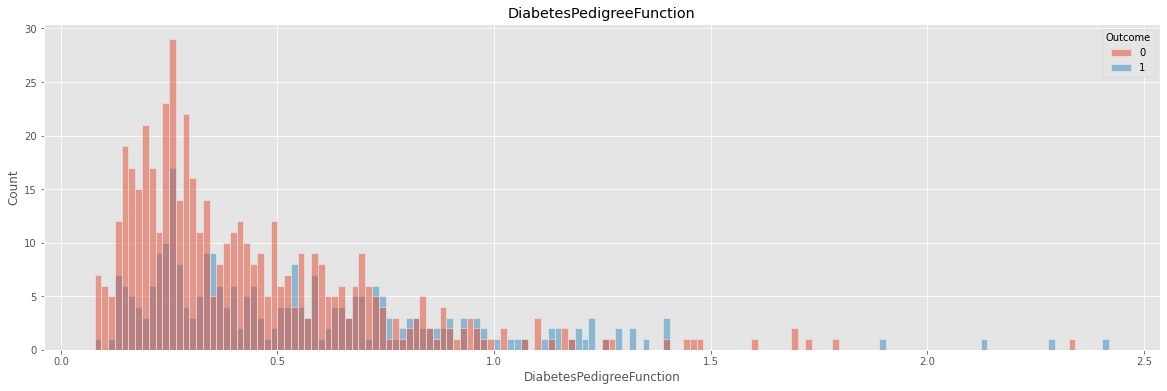

In [98]:
plt.figure(figsize=(20,6))
sns.histplot(data=diabetes_df,x='DiabetesPedigreeFunction',bins=150,hue='Outcome')
plt.title('DiabetesPedigreeFunction')
plt.show()

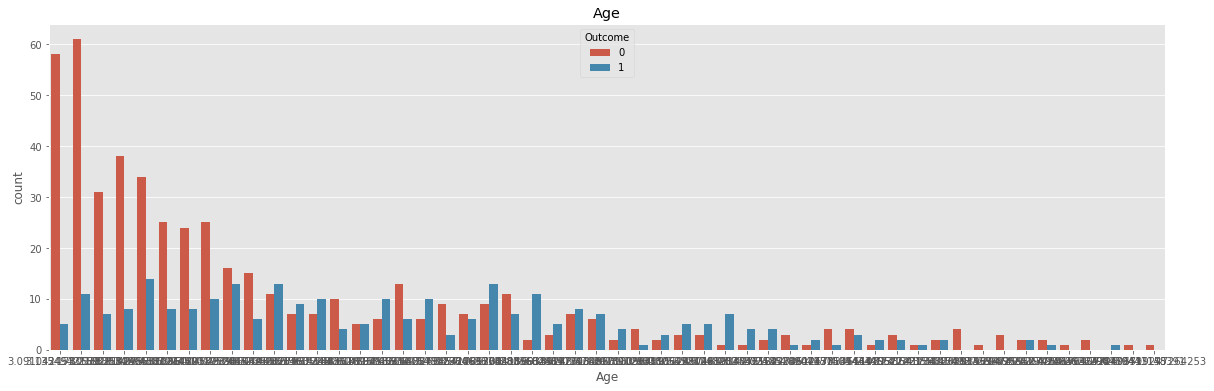

In [99]:
plt.figure(figsize=(20,6))
sns.countplot(data=diabetes_df,x='Age',hue='Outcome')
plt.title('Age')
plt.show()

In [100]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052    4.778974      71.839844       3.343990    4.840466   
std       3.369578    0.247527      12.370281       0.376198    0.679153   
min       0.000000    3.806662      24.000000       2.079442    2.708050   
25%       1.000000    4.612633      62.000000       3.091042    4.378882   
50%       3.000000    4.770685      72.000000       3.401197    4.875197   
75%       6.000000    4.950527      80.000000       3.610918    5.269144   
max      17.000000    5.298317     122.000000       4.605170    6.741701   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean     3.488413                  0.471876    3.481574    0.348958  
std      0.204323                  0.331329    0.313364    0.476951  
min      2.954910                  0.078000    3.091042    0.000000  
25%      3.349904                  0.243750    3.218876    0.000000  
50%      3.496508                  0.372500    3.401197    0.000000  
75%      3.627004                  0.626250    3.737670    1.000000  
max      4.220977                  2.420000    4.406719    1.000000

#### Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

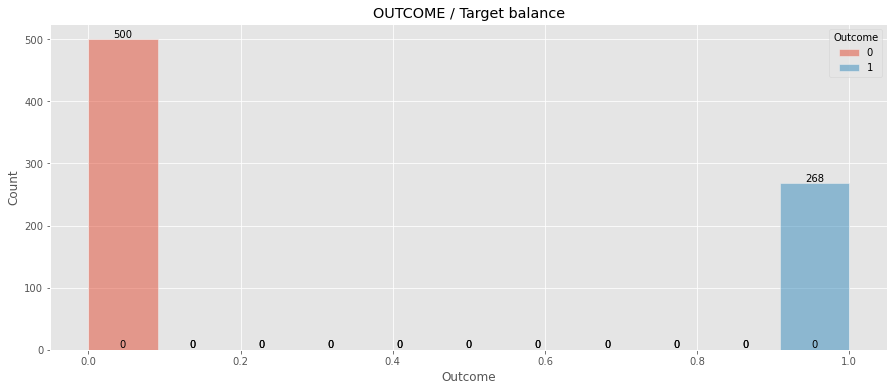

In [101]:
plt.figure(figsize=(15, 6))
ax = sns.histplot(data=diabetes_df, x='Outcome', hue='Outcome')

for i in ax.containers:
    ax.bar_label(i)
    
plt.title('OUTCOME / Target balance')
plt.show()

We see **0** as the False and **1** as the True cases in the data, i.e:

- 0: Person does not have diabetes
- 1: Person has diabetes

In [102]:
no_dbs = diabetes_df[diabetes_df['Outcome'] == 0]
dbs = diabetes_df[diabetes_df['Outcome'] == 1]

print('1: Percentage of people with diabetes: ', round(dbs.shape[0]/diabetes_df.shape[0]*100, ndigits=2))
print('0: Percentage of people not with diabetes: ', round(no_dbs.shape[0]/diabetes_df.shape[0]*100, ndigits=2))

1: Percentage of people with diabetes:  34.9
0: Percentage of people not with diabetes:  65.1


Almost **35** percent of people in the dataset have diabetes while **65** percent don't, this tips the balance of bias in the **0** variable, which we will try to minimize if it causes the respective algorithm to bias in the predictions

### Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

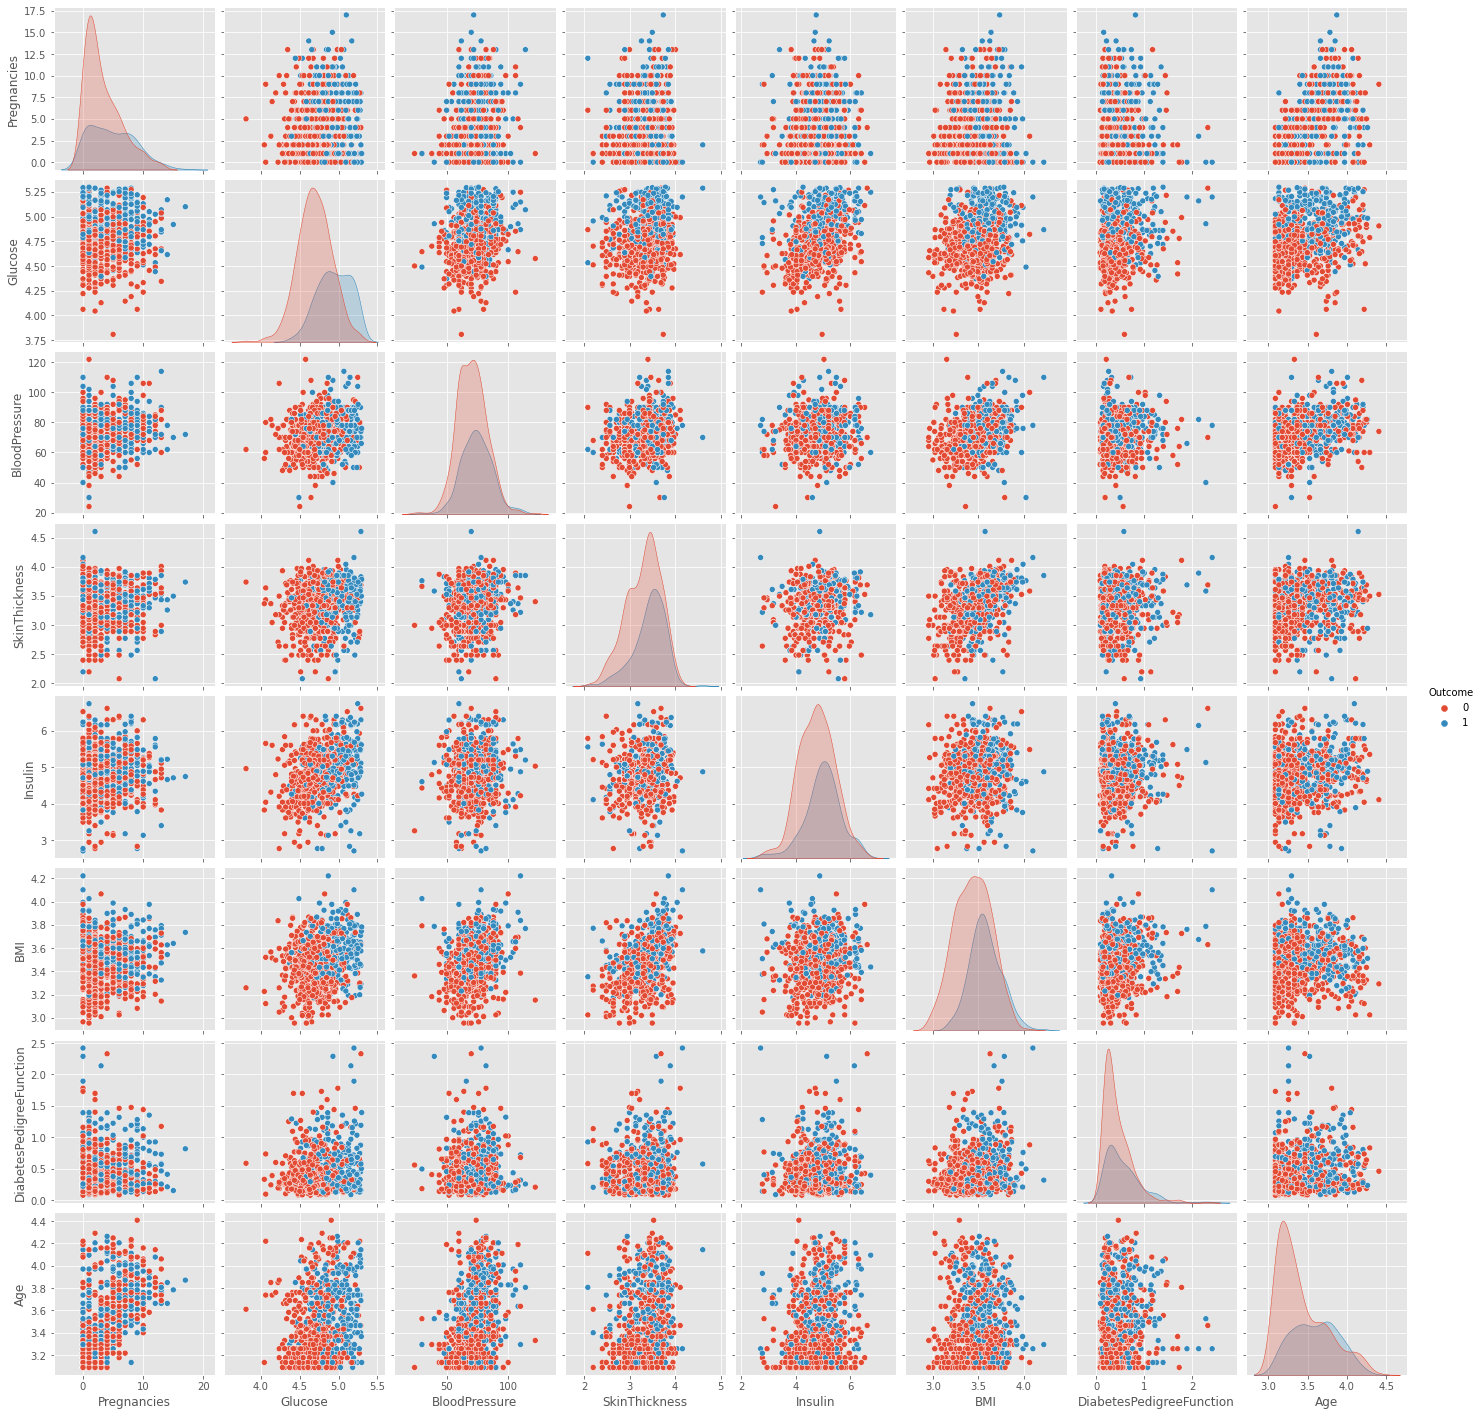

In [103]:
sns.pairplot(diabetes_df, hue='Outcome')
plt.show()

The scatter plot is said to be in a relation with the variables if the points are in a narrow band (up/down) describing the type of relationship

- Through the pairplot, we observe in the **pregnancies** column that women who are pregnant more than 10-12 times are more likely to have diabetes which in result have higher glucose levels.
- Also people who have diabetes have higher minimum **Glucose** levels than people who don't, in other cases people who have higher **SkinThickness** and lower **Insulin** levels tend to develop diabetes.
- The **BMI** serves as an measure to indicates the ideal range of Body Mass of an individual, the ideal range is **18.5 to 24.9**, people with diabetes have higher ranges resulting to obese or extremely obese states.
- There are also some cases in the data which pictures the diabetes are through family history. Though **BMI** and **DiabetesPedigreeFunction** shows some relationship which could mean that structure of a body can be genetic which if not cared can result to diabetes.
- We see people develop diabetes in their twenties and atmost their seventies, no cases are seen above 70-75 which can state that the people who had diabetes were cured or they did not survive past it.
- People with diabetes have higher **Glucose** min-mid-max levels
- People with **Glucose** levels above **125** and **BloodPressure** between **40 to 110**

### Perform correlation analysis. Visually explore it using a heat map.

In [104]:
diabetes_df.corrwith(diabetes_df['Outcome']).sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.481991
BMI                         0.322068
Age                         0.274247
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
SkinThickness               0.165982
Insulin                     0.158483
BloodPressure               0.152016
dtype: float64

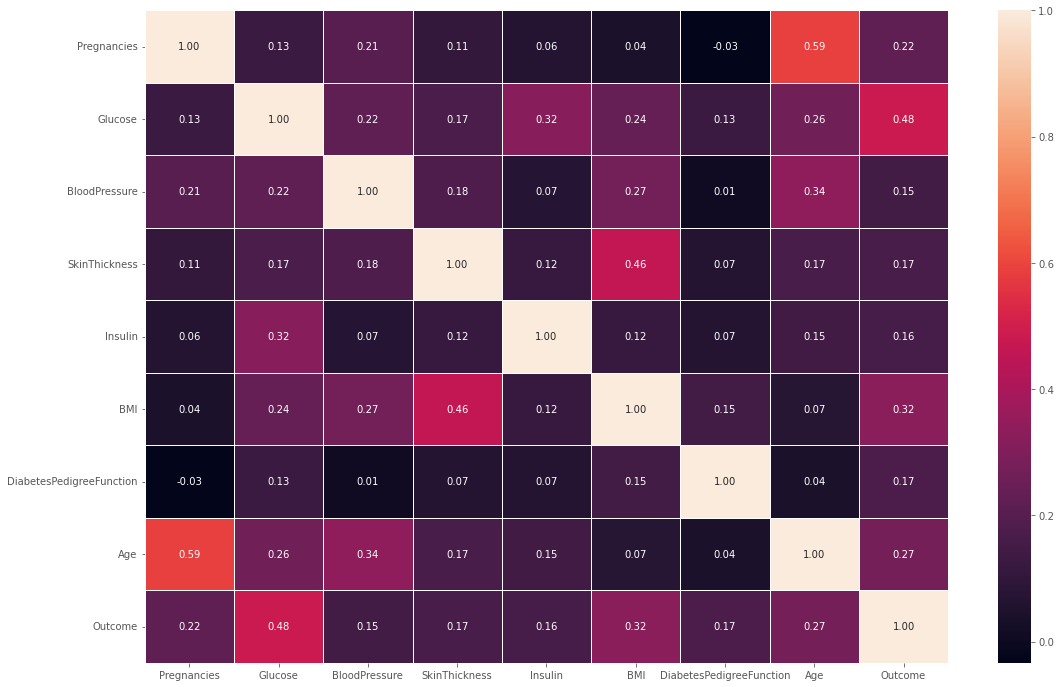

In [105]:
plt.figure(figsize=(18, 12))
sns.heatmap(diabetes_df.corr(), fmt='.2f', annot=True, 
           linecolor='white', linewidths=0.5)
plt.show()

The correlation heatmap signifies the correlation between the variables,

- **0** indicates **neutral**
- **1** indicates **positive correlation**
- **-1** indicates **negative correlations**

Note: The **1.00** values are the same variables which are cross referenced in the heatmap, they are always positively related to themselves.

# FEATURE ENGINEERING

## Creating bins for continous data

In [106]:
# Creating Age Groups
#diabetes_df['age_group'] = pd.cut(diabetes_df.Age,bins=[0,21,50,90],labels=['child','adult','elderly'])

# Creating BMI classes
#diabetes_df['BMI_group'] = pd.cut(diabetes_df.BMI,bins=[0,18.5,24.9,29.9,34.9,39.9,70],
#                                   labels=['underweight','Healthy weight','overweight','Obese','Severely obese','Morbidly obese'])
# Creating Insulin groups
#diabetes_df['Insulin_group'] = pd.cut(diabetes_df.Insulin, bins=[0,140,200,900],labels=['Normal','pre-diabetes','Diabetes'])

# Blood_pressure groups
#diabetes_df['BP_group'] = pd.cut(diabetes_df.BloodPressure, bins=[0,60,80,90,130], labels=['Low','Normal','Elevated','High'])

# Pregnancies group
#diabetes_df['Pregnancies_group'] = pd.cut(diabetes_df.Pregnancies, bins=[0,3,6,20],labels=['few','few_more','many'])

# Glucose groups
#['Glucose_group'] = pd.cut(diabetes_df.Glucose, bins=[0,99,125,200],labels=['Normal_glucose','Pre_diabetes','Diabetes'])

# Skin thickness
#diabetes_df['SkinThickness_group'] = pd.cut(diabetes_df.SkinThickness, bins=[0,18,30,100],labels=['good','normal','excess'])

# Diabetes 
#diabetes_df['pedigree_group'] = pd.cut(diabetes_df.DiabetesPedigreeFunction, bins=[0,0.25,0.5,1,3],labels=['lowest','min','mid','max'])

In [107]:
#diabetes_df.drop(['Insulin','Glucose'],axis=1,inplace=True)

#diabetes_df.drop(['Age','BMI','Insulin','BloodPressure','Glucose','SkinThickness','Pregnancies','DiabetesPedigreeFunction']
 #                ,axis=1,inplace=True)
diabetes_df

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0              6  5.003946             72       3.583519  4.553877  3.543854   
1              1  4.454347             66       3.401197  4.553877  3.317816   
2              8  5.214936             64       3.401197  4.553877  3.190476   
3              1  4.499810             66       3.178054  4.553877  3.370738   
4              0  4.927254             40       3.583519  5.129899  3.786460   
..           ...       ...            ...            ...       ...       ...   
763           10  4.624973             76       3.891820  5.198497  3.523415   
764            2  4.812184             70       3.332205  5.198497  3.632309   
765            5  4.804021             72       3.178054  4.727388  3.303217   
766            1  4.844187             60       3.178054  4.727388  3.437208   
767            1  4.543295             70       3.465736  4.727388  3.446808   

     DiabetesPedigreeFunction       Age  Outcome  
0                       0.627  3.931826        1  
1                       0.351  3.465736        0  
2                       0.672  3.496508        1  
3                       0.167  3.091042        0  
4                       2.288  3.526361        1  
..                        ...       ...      ...  
763                     0.171  4.158883        0  
764                     0.340  3.332205        0  
765                     0.245  3.433987        0  
766                     0.349  3.871201        1  
767                     0.315  3.178054        0  

[768 rows x 9 columns]

In [108]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [109]:
#diabetes_df.Pregnancies_group.value_counts()

In [110]:
#diabetes_df.Pregnancies_group.fillna('few',inplace=True)
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [111]:
# diabetes_df = pd.get_dummies(diabetes_df,drop_first=True)

from sklearn.preprocessing import LabelEncoder le = LabelEncoder() cat_cols = ['age_group','BMI_group','Insulin_group','BP_group','Pregnancies_group','Glucose_group','SkinThickness_group','pedigree_group'] cat_cols2 = ['Insulin_group']

for cols in cat_cols2: diabetes_df[cols] = le.fit_transform(diabetes_df[cols])

In [112]:
diabetes_df

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0              6  5.003946             72       3.583519  4.553877  3.543854   
1              1  4.454347             66       3.401197  4.553877  3.317816   
2              8  5.214936             64       3.401197  4.553877  3.190476   
3              1  4.499810             66       3.178054  4.553877  3.370738   
4              0  4.927254             40       3.583519  5.129899  3.786460   
..           ...       ...            ...            ...       ...       ...   
763           10  4.624973             76       3.891820  5.198497  3.523415   
764            2  4.812184             70       3.332205  5.198497  3.632309   
765            5  4.804021             72       3.178054  4.727388  3.303217   
766            1  4.844187             60       3.178054  4.727388  3.437208   
767            1  4.543295             70       3.465736  4.727388  3.446808   

     DiabetesPedigreeFunction       Age  Outcome  
0                       0.627  3.931826        1  
1                       0.351  3.465736        0  
2                       0.672  3.496508        1  
3                       0.167  3.091042        0  
4                       2.288  3.526361        1  
..                        ...       ...      ...  
763                     0.171  4.158883        0  
764                     0.340  3.332205        0  
765                     0.245  3.433987        0  
766                     0.349  3.871201        1  
767                     0.315  3.178054        0  

[768 rows x 9 columns]

In [113]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


### Data Modeling:
**Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.**

We will try using **cross validation** method for model validation rather than **train-test split**, as train-test split will split model in a ratio in a random state which will cause some data to be left out for training and some for testing, using a cross validation method will split and use each splits for training and testing, thus resulting in an much accurate model validation rather than **train-test split.**

**Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.**

What we will do here is we will first start with the **KNN** algo, then compare it with other models.

- **Process**: Feature and Target splitting -> KNN -> Validation -> Other algos -> Validation -> Compare -> Conclusion

We will refer our **features** as **X** and **target** as **y** variable(s).

In [114]:
# A quick check of the dataset
print(diabetes_df.info())
diabetes_df.head(7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6  5.003946             72       3.583519  4.553877  3.543854   
1            1  4.454347             66       3.401197  4.553877  3.317816   
2            8  5.214936             64       3.401197  4.553877  3.190476   
3            1  4.499810             66       3.178054  4.553877  3.370738   
4            0  4.927254             40       3.583519  5.129899  3.786460   
5            5  4.762174             74       3.583519  5.129899  3.280911   
6            3  4.369448             50       3.496508  4.488636  3.465736   

   DiabetesPedigreeFunction       Age  Outcome  
0                     0.627  3.931826        1  
1                     0.351  3.465736        0  
2                     0.672  3.496508        1  
3                     0.167  3.091042        0  
4                     2.288  3.526361        1  
5                     0.201  3.433987        0  
6                     0.248  3.295837        1

We can use iloc function to slice the dataset, **Outcome** as **y** and rest as **X**. (Original Dataset is not modified)

**OR**

we can use pop function to pop out the **target.** (Original Dataset is modified)

In [115]:
y = diabetes_df.pop('Outcome')
X = diabetes_df

In [116]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

Splitted dataset into features and target successfully

In [117]:
print(f'X:{X.shape}\ny:{y.shape}')

X:(768, 8)
y:(768,)


In [118]:
# Create a scaled dataset as well

from sklearn.preprocessing import StandardScaler, MinMaxScaler

mmscalar = MinMaxScaler()
sscalar = StandardScaler()

**RandomUnderSampler for balancing the bias which will be caused by class imbalance**

In [58]:
!pip install -U imbalanced-learn

In [130]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
rus.fit(X, y)

X_resampled, y_resampled = rus.fit_resample(X, y)
sX_resampled = mmscalar.fit_transform(X_resampled)

In [120]:
#pyinstaller -F --hidden-import="sklearn.utils._cython_blas" --hidden-import="sklearn.neighbors.typedefs" --hidden-import="sklearn.neighbors.quad_tree" --hidden-import="sklearn.tree._utils" Datamanager.py

In [121]:
#import sklearn.utils._cython_blas

In [122]:
#import sklearn.neighbors.typedefs
#import sklearn.neighbors.quad_tree
#import sklearn.tree
#import sklearn.tree._utils

In [166]:
!pip install sklearn.utils

  Created wheel for sklearn.utils: filename=sklearn_utils-0.0.15-py3-none-any.whl size=27890 sha256=10ad438bde67b94f86f73ab84454241e998eb4b06c8eb18b57214ff40c8a5a19
  Stored in directory: c:\users\hp.desktop-5ihnlmq\appdata\local\pip\cache\wheels\ae\aa\20\75c06f64979aca41815d1fbdcc71599330da9b60cc4f8de0b2
Successfully built sklearn.utils


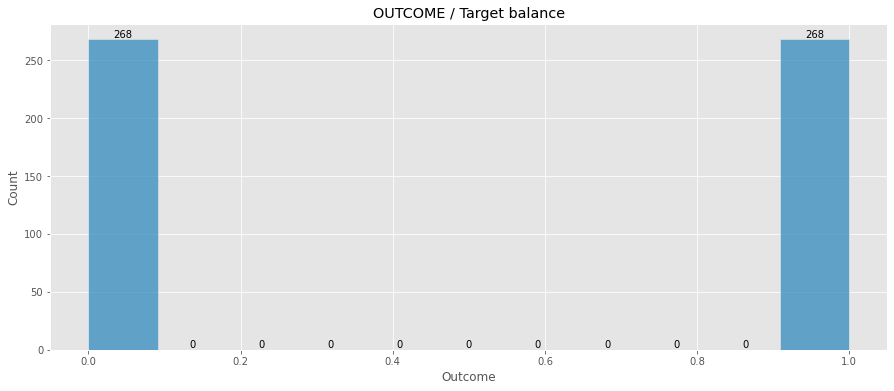

In [123]:
plt.figure(figsize=(15, 6))
ax = sns.histplot(data=y_sampled, stat='count')
for i in ax.containers:
    ax.bar_label(i)
plt.title('OUTCOME / Target balance')
plt.show()

**Modelling and Validation**

Creating a function for easy visualization between scaled and unscaled data

In [131]:
def vizr(unscaled_set, scaled_set):
    plt.figure(figsize=(20, 10))
    #ACCURACY UNSCALED PLOT 1
    plt.subplot(2, 4 ,1)
    plt.plot(unscaled_set['test_accuracy'], label='Test')
    plt.plot(unscaled_set['train_accuracy'], label='Train')
    plt.title('Accuracy Unscaled')
    plt.legend()
    # ACCURACY SCALED PLOT 2
    plt.subplot(2, 4 , 2)
    plt.plot(scaled_set['test_accuracy'], label='Test')
    plt.plot(scaled_set['train_accuracy'], label='Train')
    plt.title('Accuracy Scaled')
    plt.legend()
    # F1 UNSCALED PLOT 3
    plt.subplot(2, 4, 3)
    plt.plot(unscaled_set['test_f1'], label='Test')
    plt.plot(unscaled_set['train_f1'], label='Train')
    plt.title('f1 score UnScaled')
    plt.legend()
    # F1 SCALED PLOT 4
    plt.subplot(2, 4 , 4)
    plt.plot(scaled_set['test_f1'], label='Test')
    plt.plot(scaled_set['train_f1'], label='Train')
    plt.title('f1 Score Scaled')
    plt.legend()
    # RECALL UNSCALED PLOT 5
    plt.subplot(2, 4, 5)
    plt.plot(unscaled_set['test_recall'], label='Test')
    plt.plot(unscaled_set['train_recall'], label='Train')
    plt.title('Recall Unscaled')
    plt.legend()
    # RECALL SCALED PLOT 6
    plt.subplot(2, 4, 6)
    plt.plot(scaled_set['test_recall'], label='Test')
    plt.plot(scaled_set['train_recall'], label='Train')
    plt.title('Recall Scaled')
    plt.legend()
    # PRECISION UNSACALED PLOT 7
    plt.subplot(2, 4, 7)
    plt.plot(unscaled_set['test_precision'], label='Test')
    plt.plot(unscaled_set['train_precision'], label='Train')
    plt.title('Precision Unscaled')
    plt.legend()
    # PRECISION SCALED PLOT 8
    plt.plot(2, 4, 8)
    plt.plot(scaled_set['test_precision'], label='Test')
    plt.plot(scaled_set['train_precision'], label='Train')
    plt.title('Precision Scaled')
    plt.legend()
    
    plt.tight_layout()

The function above plots all scores for scaled and unscaled sets in one chart comparing it, except training and testing of unscaled and scaled sets of data, As Overfitting is observed when there is more than minimal difference between training and testing scores

## KNN algorithem for classification

In [132]:
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import confusion_matrix

In [133]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=5)
sknc = KNeighborsClassifier()  # we will keep the default parameters

## X set

   Mean accuracy:  60.63
   Mean f1 score:       59.37
   Mean recall score:    58.16
   Mean precision score:  61.02


{'fit_time': array([0.00500298, 0.00500488, 0.00400543, 0.0050025 , 0.00600719]),
 'score_time': array([0.01701307, 0.01601219, 0.0190134 , 0.01501155, 0.01300502]),
 'test_accuracy': array([0.62037037, 0.58878505, 0.56074766, 0.63551402, 0.62616822]),
 'train_accuracy': array([0.75233645, 0.73892774, 0.73193473, 0.73659674, 0.74825175]),
 'test_f1': array([0.60952381, 0.59259259, 0.49462366, 0.63551402, 0.63636364]),
 'train_f1': array([0.75348837, 0.73584906, 0.72289157, 0.73286052, 0.73658537]),
 'test_recall': array([0.59259259, 0.60377358, 0.43396226, 0.62962963, 0.64814815]),
 'train_recall': array([0.75700935, 0.7255814 , 0.69767442, 0.72429907, 0.70560748]),
 'test_precision': array([0.62745098, 0.58181818, 0.575     , 0.64150943, 0.625     ]),
 'train_precision': array([0.75      , 0.74641148, 0.75      , 0.74162679, 0.77040816])}

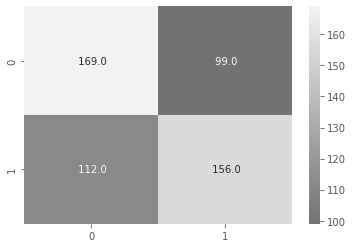

In [134]:
# we will enter our estimator(algo), X (features), y (train), cv(folds / splits of dataset)

knn_CV = cross_validate(knc, X_resampled, y_resampled, 
                       cv=5, scoring=['accuracy', 'f1','recall',
                                     'precision'], return_train_score=True)

print('   Mean accuracy: ', round(knn_CV['test_accuracy'].mean()*100, ndigits=2))
print('   Mean f1 score:      ',round(knn_CV['test_f1'].mean()*100, ndigits=2))
print('   Mean recall score:   ', round(knn_CV['test_recall'].mean()*100, ndigits=2))
print('   Mean precision score: ',round(knn_CV['test_precision'].mean()*100, ndigits=2))

# Confusion Matrix
knn_pred = cross_val_predict(knc, X_resampled, y_resampled, cv=5)
knn_conf = confusion_matrix(y_resampled, knn_pred)
sns.heatmap(knn_conf, cmap='binary_r', annot=True, fmt=' .1f', alpha=0.5)

knn_CV

## Scaled X set

  Mean accuracy score:   72.95
  Mean f1 score:    73.04
  Mean recall score:   73.49
  Mean precision score:  72.68


{'fit_time': array([0., 0., 0., 0., 0.]),
 'score_time': array([0.01561427, 0.01562309, 0.01562047, 0.015625  , 0.01562548]),
 'test_accuracy': array([0.72222222, 0.71028037, 0.71028037, 0.74766355, 0.75700935]),
 'train_accuracy': array([0.82943925, 0.82750583, 0.81118881, 0.8018648 , 0.81585082]),
 'test_f1': array([0.71698113, 0.71559633, 0.69902913, 0.75229358, 0.76785714]),
 'train_f1': array([0.82903981, 0.8271028 , 0.81118881, 0.79809976, 0.81498829]),
 'test_recall': array([0.7037037 , 0.73584906, 0.67924528, 0.75925926, 0.7962963 ]),
 'train_recall': array([0.8271028 , 0.82325581, 0.80930233, 0.78504673, 0.81308411]),
 'test_precision': array([0.73076923, 0.69642857, 0.72      , 0.74545455, 0.74137931]),
 'train_precision': array([0.83098592, 0.83098592, 0.81308411, 0.8115942 , 0.81690141])}

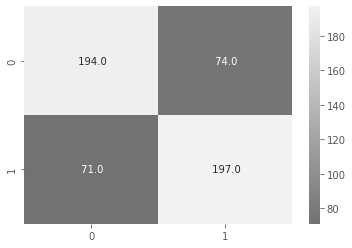

In [135]:
sknn_CV = cross_validate(sknc, sX_resampled, y_resampled,
                        cv=5, scoring=['accuracy','f1',
                                      'recall','precision'],
                        return_train_score=True)

print('  Mean accuracy score:  ',round(sknn_CV['test_accuracy'].mean()*100, ndigits=2))
print('  Mean f1 score:   ', round(sknn_CV['test_f1'].mean()*100, ndigits=2))
print('  Mean recall score:  ', round(sknn_CV['test_recall'].mean()*100, ndigits=2))
print('  Mean precision score: ', round(sknn_CV['test_precision'].mean()*100, ndigits=2))

# Confusion Matrix
sknn_pred = cross_val_predict(sknc, sX_resampled, y_resampled, cv=5)
sknn_conf = confusion_matrix(y_resampled, sknn_pred)
sns.heatmap(sknn_conf, cmap='binary_r', annot=True, fmt=' .1f', alpha=0.5)

sknn_CV

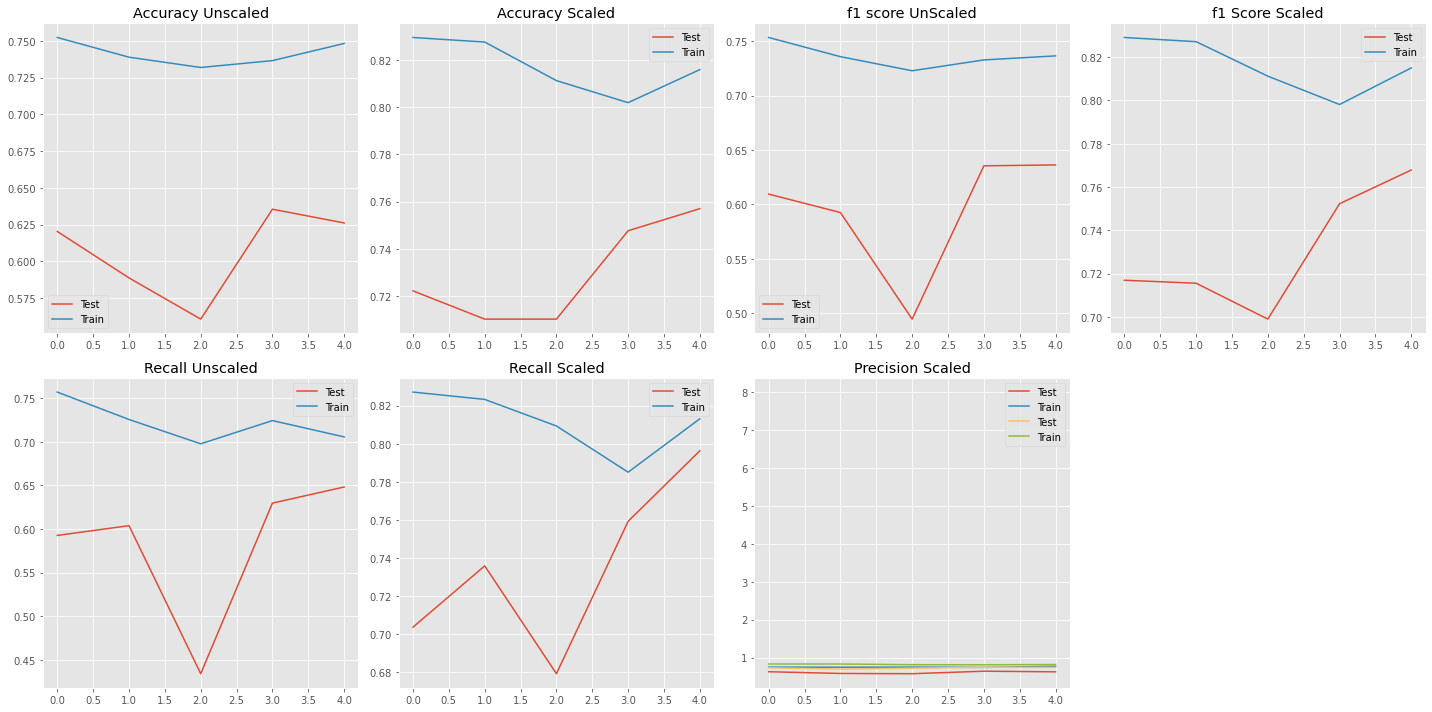

In [136]:
vizr(knn_CV, sknn_CV)

**Now we move on to other algorithms**

**Logistic Regression**

In [137]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight='balanced')  # Default parameter
slogreg = LogisticRegression()

## X set

  Mean accuracy score:  74.45
  Mean f1 score:        74.37
  Mean recall score:    73.88
  Mean precision score: 75.32


{'fit_time': array([0.31250119, 0.06250262, 0.04687524, 0.03125048, 0.03124738]),
 'score_time': array([0.01562643, 0.01562142, 0.01562381, 0.01562834, 0.        ]),
 'test_accuracy': array([0.7037037 , 0.71028037, 0.80373832, 0.76635514, 0.73831776]),
 'train_accuracy': array([0.75700935, 0.78088578, 0.75058275, 0.73426573, 0.77156177]),
 'test_f1': array([0.69811321, 0.72072072, 0.78350515, 0.76190476, 0.75438596]),
 'train_f1': array([0.7535545 , 0.78139535, 0.75288684, 0.73239437, 0.76886792]),
 'test_recall': array([0.68518519, 0.75471698, 0.71698113, 0.74074074, 0.7962963 ]),
 'train_recall': array([0.74299065, 0.78139535, 0.75813953, 0.72897196, 0.76168224]),
 'test_precision': array([0.71153846, 0.68965517, 0.86363636, 0.78431373, 0.71666667]),
 'train_precision': array([0.76442308, 0.78139535, 0.74770642, 0.73584906, 0.77619048])}

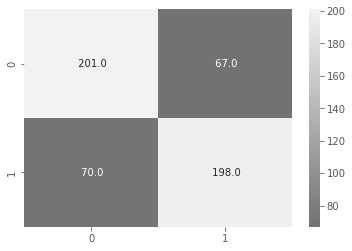

In [138]:
logreg_CV = cross_validate(logreg, X_resampled, y_resampled,
                          cv=5, scoring=['accuracy', 'f1', 'recall','precision'], return_train_score=True)

print('  Mean accuracy score: ',round(logreg_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(logreg_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(logreg_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(logreg_CV['test_precision'].mean()*100,ndigits=2))

# Confusion Matrix
lr_pred = cross_val_predict(logreg, X_resampled, y_resampled, cv=5)
lr_conf = confusion_matrix(y_resampled, lr_pred)

sns.heatmap(lr_conf, cmap='binary_r', annot=True, fmt=' .1f', alpha=0.5)
logreg_CV

## Scaled X set

  Mean accuracy score:  74.82
  Mean f1 score:        75.03
  Mean recall score:    75.36
  Mean precision score: 74.92


{'fit_time': array([0.        , 0.        , 0.01562643, 0.01562476, 0.        ]),
 'score_time': array([0.        , 0.01562548, 0.        , 0.        , 0.        ]),
 'test_accuracy': array([0.71296296, 0.71028037, 0.77570093, 0.81308411, 0.72897196]),
 'train_accuracy': array([0.76869159, 0.76689977, 0.74358974, 0.73892774, 0.76456876]),
 'test_f1': array([0.72072072, 0.72072072, 0.76      , 0.81132075, 0.73873874]),
 'train_f1': array([0.76705882, 0.76525822, 0.74770642, 0.73953488, 0.76009501]),
 'test_recall': array([0.74074074, 0.75471698, 0.71698113, 0.7962963 , 0.75925926]),
 'train_recall': array([0.76168224, 0.75813953, 0.75813953, 0.74299065, 0.74766355]),
 'test_precision': array([0.70175439, 0.68965517, 0.80851064, 0.82692308, 0.71929825]),
 'train_precision': array([0.77251185, 0.77251185, 0.73755656, 0.73611111, 0.77294686])}

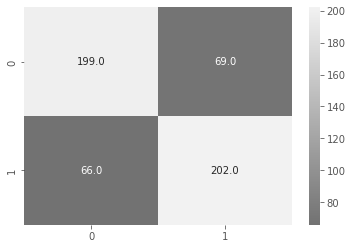

In [139]:
slogreg_CV = cross_validate(slogreg,sX_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(slogreg_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(slogreg_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(slogreg_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(slogreg_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
slr_pred = cross_val_predict(slogreg,sX_resampled, y_resampled, cv=5)
slr_conf = confusion_matrix(y_resampled, slr_pred)
sns.heatmap(slr_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
slogreg_CV

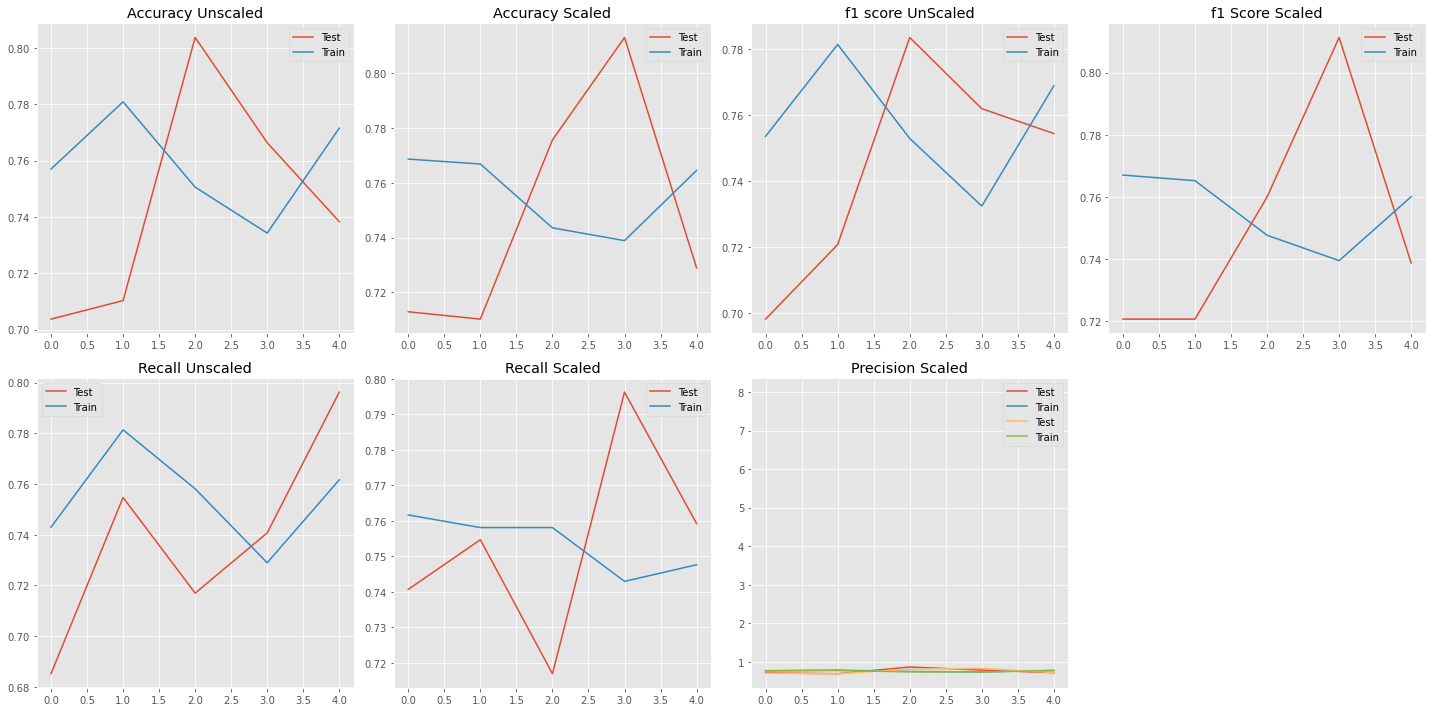

In [140]:
vizr(logreg_CV, slogreg_CV)

## RandomForest C;assifier

In [141]:
from sklearn.ensemble import RandomForestClassifier


In [142]:
rfc = RandomForestClassifier(max_depth=10, max_leaf_nodes=15,
                            n_estimators=100, class_weight='balanced_subsample')
srfc = RandomForestClassifier(max_depth=5, max_leaf_nodes=7,
                             n_estimators=100, class_weight='balanced', ccp_alpha=0.01)

## X set

  Mean accuracy score:  74.44
  Mean f1 score:        75.31
  Mean recall score:    77.96
  Mean precision score: 73.07


{'fit_time': array([0.46875477, 0.29689336, 0.26564527, 0.28125691, 0.28244305]),
 'score_time': array([0.0156281 , 0.0156064 , 0.03123212, 0.01563716, 0.0156219 ]),
 'test_accuracy': array([0.73148148, 0.71962617, 0.76635514, 0.76635514, 0.73831776]),
 'train_accuracy': array([0.86682243, 0.88111888, 0.85547786, 0.86713287, 0.87412587]),
 'test_f1': array([0.74782609, 0.72727273, 0.75728155, 0.7706422 , 0.76271186]),
 'train_f1': array([0.87191011, 0.88221709, 0.85909091, 0.87133183, 0.87782805]),
 'test_recall': array([0.7962963 , 0.75471698, 0.73584906, 0.77777778, 0.83333333]),
 'train_recall': array([0.90654206, 0.88837209, 0.87906977, 0.90186916, 0.90654206]),
 'test_precision': array([0.70491803, 0.70175439, 0.78      , 0.76363636, 0.703125  ]),
 'train_precision': array([0.83982684, 0.87614679, 0.84      , 0.84279476, 0.85087719])}

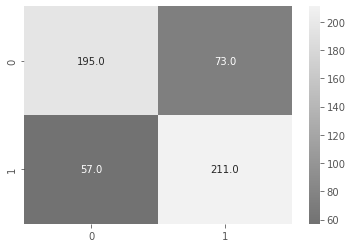

In [143]:
rfc_CV = cross_validate(rfc,X_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(rfc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(rfc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(rfc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(rfc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
rfc_pred = cross_val_predict(rfc,X_resampled, y_resampled, cv=5)
rfc_conf = confusion_matrix(y_resampled, rfc_pred)
sns.heatmap(rfc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
rfc_CV

## Scaled X set

  Mean accuracy score:  77.25
  Mean f1 score:        78.04
  Mean recall score:    80.59
  Mean precision score: 75.82


{'fit_time': array([0.26563025, 0.29687595, 0.21876764, 0.25638795, 0.25840211]),
 'score_time': array([0.03125   , 0.03125095, 0.0156076 , 0.02201843, 0.02300167]),
 'test_accuracy': array([0.72222222, 0.75700935, 0.78504673, 0.82242991, 0.77570093]),
 'train_accuracy': array([0.8317757 , 0.83449883, 0.80885781, 0.82750583, 0.83216783]),
 'test_f1': array([0.74137931, 0.76785714, 0.78095238, 0.82242991, 0.78947368]),
 'train_f1': array([0.83561644, 0.83900227, 0.82017544, 0.83333333, 0.83486239]),
 'test_recall': array([0.7962963 , 0.81132075, 0.77358491, 0.81481481, 0.83333333]),
 'train_recall': array([0.85514019, 0.86046512, 0.86976744, 0.86448598, 0.85046729]),
 'test_precision': array([0.69354839, 0.72881356, 0.78846154, 0.83018868, 0.75      ]),
 'train_precision': array([0.81696429, 0.81858407, 0.77593361, 0.80434783, 0.81981982])}

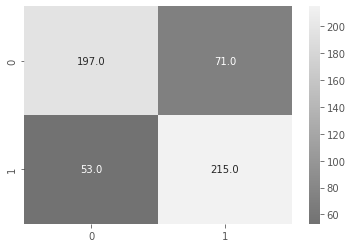

In [144]:
srfc_CV = cross_validate(srfc,sX_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(srfc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(srfc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(srfc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(srfc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
srfc_pred = cross_val_predict(srfc,sX_resampled, y_resampled, cv=5)
srfc_conf = confusion_matrix(y_resampled, srfc_pred)
sns.heatmap(srfc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
srfc_CV


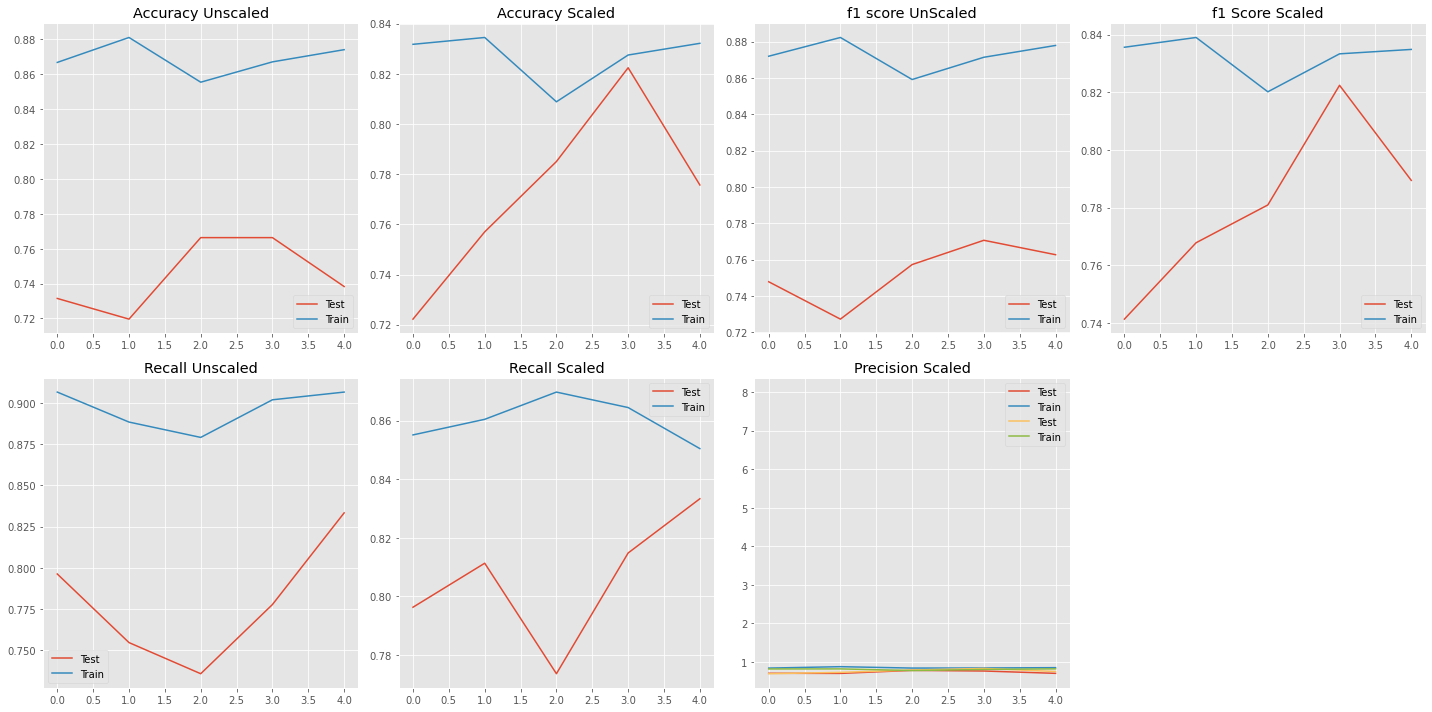

In [145]:
vizr(rfc_CV, srfc_CV)

## XGboost Classifire

In [146]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [147]:
!pip install xgboost

In [148]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=6, max_leaves=8,
                    learning_rate=0.01)
xgbc1 = XGBClassifier(max_depth=6, max_leaves=8,
                     learning_rate=0.01)

## X set

  Mean accuracy score:  74.63
  Mean f1 score:        75.56
  Mean recall score:    78.39
  Mean precision score: 73.1


{'fit_time': array([0.73769999, 0.17717624, 0.18242288, 0.12473392, 0.22201633]),
 'score_time': array([0.03125119, 0.01562524, 0.02101851, 0.03125143, 0.01562452]),
 'test_accuracy': array([0.75      , 0.72897196, 0.76635514, 0.79439252, 0.69158879]),
 'train_accuracy': array([0.91121495, 0.93240093, 0.91841492, 0.8997669 , 0.91375291]),
 'test_f1': array([0.75229358, 0.75213675, 0.77477477, 0.7962963 , 0.7027027 ]),
 'train_f1': array([0.91363636, 0.9330254 , 0.92027335, 0.90205011, 0.91533181]),
 'test_recall': array([0.75925926, 0.83018868, 0.81132075, 0.7962963 , 0.72222222]),
 'train_recall': array([0.93925234, 0.93953488, 0.93953488, 0.92523364, 0.93457944]),
 'test_precision': array([0.74545455, 0.6875    , 0.74137931, 0.7962963 , 0.68421053]),
 'train_precision': array([0.88938053, 0.9266055 , 0.90178571, 0.88      , 0.89686099])}

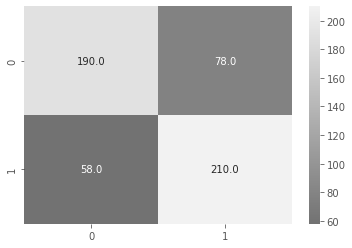

In [149]:
xgbc_CV = cross_validate(xgbc,X_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(xgbc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(xgbc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(xgbc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(xgbc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
xgb_pred = cross_val_predict(xgbc,X_resampled, y_resampled, cv=5)
xgb_conf = confusion_matrix(y_resampled, xgb_pred)
sns.heatmap(xgb_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
xgbc_CV

## Scaled X set

  Mean accuracy score:  75.0
  Mean f1 score:        75.69
  Mean recall score:    78.4
  Mean precision score: 74.2


{'fit_time': array([0.15625143, 0.14062572, 0.1562531 ]),
 'score_time': array([0.01562548, 0.03125   , 0.015625  ]),
 'test_accuracy': array([0.73743017, 0.75977654, 0.75280899]),
 'train_accuracy': array([0.92436975, 0.89915966, 0.93296089]),
 'test_f1': array([0.75132275, 0.73939394, 0.78      ]),
 'train_f1': array([0.92561983, 0.8988764 , 0.93513514]),
 'test_recall': array([0.79775281, 0.67777778, 0.87640449]),
 'train_recall': array([0.93854749, 0.8988764 , 0.96648045]),
 'test_precision': array([0.71      , 0.81333333, 0.7027027 ]),
 'train_precision': array([0.91304348, 0.8988764 , 0.90575916])}

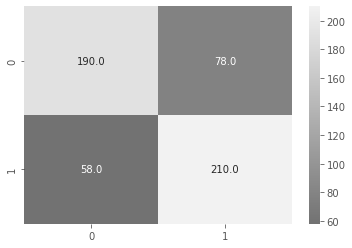

In [150]:
sxgbc_CV = cross_validate(xgbc1,sX_resampled,y_resampled,cv=3,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(sxgbc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(sxgbc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(sxgbc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(sxgbc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
sxgb_pred = cross_val_predict(xgbc1,sX_resampled, y_resampled, cv=5)
sxgb_conf = confusion_matrix(y_resampled, sxgb_pred)
sns.heatmap(sxgb_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
sxgbc_CV

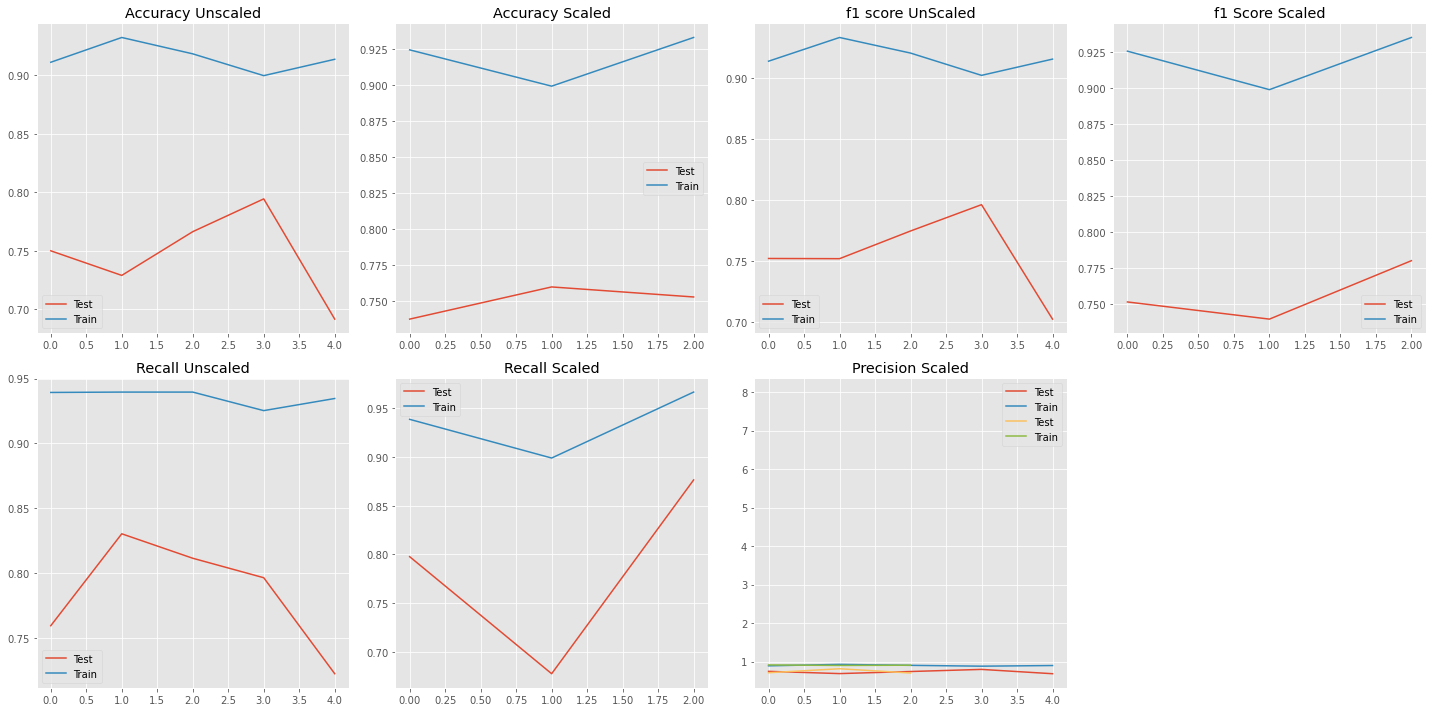

In [151]:
vizr(xgbc_CV, sxgbc_CV)

## Gaussian NB classifier

In [152]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
sgnb = GaussianNB()

## X SET

  Mean accuracy score:  73.7
  Mean f1 score:        73.75
  Mean recall score:    73.84
  Mean precision score: 73.98


{'fit_time': array([0.01562476, 0.        , 0.        , 0.        , 0.        ]),
 'score_time': array([0.        , 0.        , 0.01562715, 0.01562643, 0.0156219 ]),
 'test_accuracy': array([0.72222222, 0.6635514 , 0.75700935, 0.79439252, 0.74766355]),
 'train_accuracy': array([0.7546729 , 0.76456876, 0.72727273, 0.72960373, 0.75058275]),
 'test_f1': array([0.73684211, 0.66666667, 0.73469388, 0.79245283, 0.75675676]),
 'train_f1': array([0.75177305, 0.76566125, 0.73226545, 0.73148148, 0.75058275]),
 'test_recall': array([0.77777778, 0.67924528, 0.67924528, 0.77777778, 0.77777778]),
 'train_recall': array([0.74299065, 0.76744186, 0.74418605, 0.73831776, 0.75233645]),
 'test_precision': array([0.7       , 0.65454545, 0.8       , 0.80769231, 0.73684211]),
 'train_precision': array([0.76076555, 0.76388889, 0.72072072, 0.72477064, 0.74883721])}

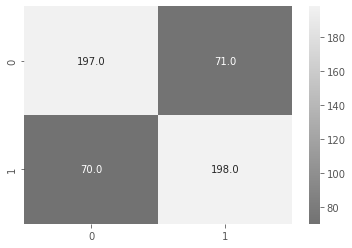

In [153]:
gnb_CV = cross_validate(gnb,X_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(gnb_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(gnb_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(gnb_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(gnb_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
gnb_pred = cross_val_predict(gnb,X_resampled, y_resampled, cv=5)
gnb_conf = confusion_matrix(y_resampled, gnb_pred)
sns.heatmap(gnb_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
gnb_CV

## Scaled X set

  Mean accuracy score:  73.7
  Mean f1 score:        73.75
  Mean recall score:    73.84
  Mean precision score: 73.98


{'fit_time': array([0.        , 0.        , 0.01562262, 0.        , 0.        ]),
 'score_time': array([0.        , 0.        , 0.        , 0.01562548, 0.01562762]),
 'test_accuracy': array([0.72222222, 0.6635514 , 0.75700935, 0.79439252, 0.74766355]),
 'train_accuracy': array([0.7546729 , 0.76456876, 0.72727273, 0.72960373, 0.75058275]),
 'test_f1': array([0.73684211, 0.66666667, 0.73469388, 0.79245283, 0.75675676]),
 'train_f1': array([0.75177305, 0.76566125, 0.73226545, 0.73148148, 0.75058275]),
 'test_recall': array([0.77777778, 0.67924528, 0.67924528, 0.77777778, 0.77777778]),
 'train_recall': array([0.74299065, 0.76744186, 0.74418605, 0.73831776, 0.75233645]),
 'test_precision': array([0.7       , 0.65454545, 0.8       , 0.80769231, 0.73684211]),
 'train_precision': array([0.76076555, 0.76388889, 0.72072072, 0.72477064, 0.74883721])}

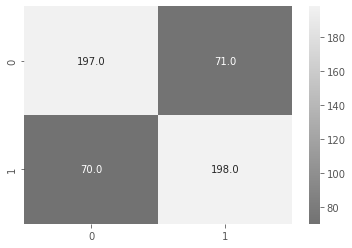

In [154]:
sgnb_CV = cross_validate(sgnb,sX_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(sgnb_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(sgnb_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(sgnb_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(sgnb_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
sgnb_pred = cross_val_predict(sgnb,sX_resampled, y_resampled, cv=5)
sgnb_conf = confusion_matrix(y_resampled, sgnb_pred)
sns.heatmap(sgnb_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
sgnb_CV

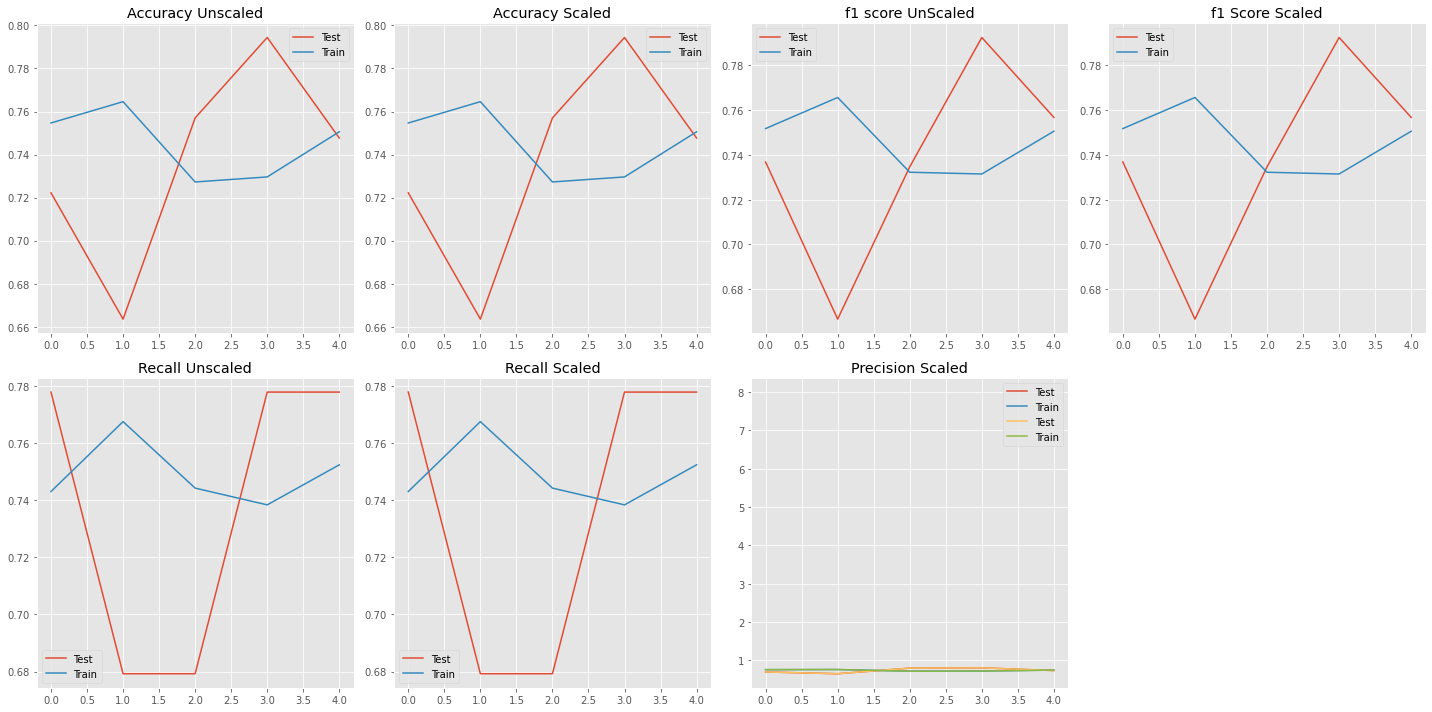

In [155]:
vizr(gnb_CV, sgnb_CV)

## Catboost classifier

In [156]:
from catboost import CatBoostClassifier

ModuleNotFoundError: No module named 'catboost'

In [157]:
!pip install catboost

In [158]:
from catboost import CatBoostClassifier

cbc = CatBoostClassifier(verbose=500)
cbc1 = CatBoostClassifier(verbose=1000, learning_rate=0.01, depth=3)

## X set

Learning rate set to 0.006981
0:	learn: 0.6898500	total: 146ms	remaining: 2m 26s
500:	learn: 0.2881541	total: 2.09s	remaining: 2.09s
999:	learn: 0.1884191	total: 4s	remaining: 0us
Learning rate set to 0.006981
0:	learn: 0.6897465	total: 7.34ms	remaining: 7.34s
500:	learn: 0.2915383	total: 1.95s	remaining: 1.94s
999:	learn: 0.1857128	total: 4.12s	remaining: 0us
Learning rate set to 0.006981
0:	learn: 0.6901710	total: 4.48ms	remaining: 4.47s
500:	learn: 0.3219325	total: 2.02s	remaining: 2.02s
999:	learn: 0.2185266	total: 4.29s	remaining: 0us
Learning rate set to 0.006981
0:	learn: 0.6893414	total: 9.25ms	remaining: 9.24s
500:	learn: 0.2963785	total: 2.27s	remaining: 2.26s
999:	learn: 0.1873299	total: 4.28s	remaining: 0us
  Mean accuracy score:  74.25
  Mean f1 score:        74.74
  Mean recall score:    76.49
  Mean precision score: 73.49
Learning rate set to 0.007171
0:	learn: 0.6904632	total: 6.07ms	remaining: 6.07s
500:	learn: 0.3036341	total: 2.25s	remaining: 2.24s
999:	learn: 0.2020

{'fit_time': array([4.6761229 , 4.65967178, 4.76319289, 4.76159477]),
 'score_time': array([0.        , 0.01500988, 0.01000285, 0.00800157]),
 'test_accuracy': array([0.73880597, 0.68656716, 0.81343284, 0.73134328]),
 'train_accuracy': array([0.97761194, 0.97761194, 0.95522388, 0.9800995 ]),
 'test_f1': array([0.75524476, 0.671875  , 0.80916031, 0.75342466]),
 'train_f1': array([0.97788698, 0.97732997, 0.95544554, 0.9800995 ]),
 'test_recall': array([0.80597015, 0.64179104, 0.79104478, 0.82089552]),
 'train_recall': array([0.99004975, 0.96517413, 0.960199  , 0.9800995 ]),
 'test_precision': array([0.71052632, 0.70491803, 0.828125  , 0.69620253]),
 'train_precision': array([0.96601942, 0.98979592, 0.95073892, 0.9800995 ])}

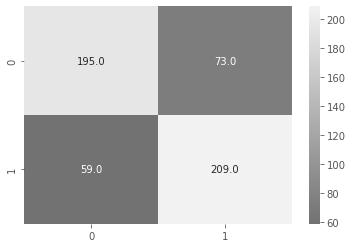

In [159]:
cbc_CV = cross_validate(cbc,X_resampled,y_resampled,cv=4,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(cbc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(cbc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(cbc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(cbc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
cbc_pred = cross_val_predict(cbc,X_resampled, y_resampled, cv=5)
cbc_conf = confusion_matrix(y_resampled, cbc_pred)
sns.heatmap(cbc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
cbc_CV

## Scaled X set

0:	learn: 0.6895798	total: 3.06ms	remaining: 3.05s
999:	learn: 0.3108386	total: 2.73s	remaining: 0us
0:	learn: 0.6897431	total: 5.65ms	remaining: 5.65s
999:	learn: 0.3128152	total: 2.64s	remaining: 0us
0:	learn: 0.6899385	total: 3.1ms	remaining: 3.1s
999:	learn: 0.3215044	total: 2.5s	remaining: 0us
0:	learn: 0.6898754	total: 2.85ms	remaining: 2.85s
999:	learn: 0.3417913	total: 2.48s	remaining: 0us
0:	learn: 0.6900453	total: 8.13ms	remaining: 8.13s
999:	learn: 0.3142321	total: 2.48s	remaining: 0us
  Mean accuracy score:  75.38
  Mean f1 score:        75.89
  Mean recall score:    76.88
  Mean precision score: 75.28
0:	learn: 0.6895798	total: 2.61ms	remaining: 2.6s
999:	learn: 0.3108386	total: 2.46s	remaining: 0us
0:	learn: 0.6897431	total: 7.73ms	remaining: 7.72s
999:	learn: 0.3128152	total: 2.6s	remaining: 0us
0:	learn: 0.6899385	total: 2.97ms	remaining: 2.97s
999:	learn: 0.3215044	total: 2.44s	remaining: 0us
0:	learn: 0.6898754	total: 3.94ms	remaining: 3.94s
999:	learn: 0.3417913	tota

{'fit_time': array([3.16015601, 3.01492381, 2.88799882, 2.87373972, 2.84140491]),
 'score_time': array([0.01562643, 0.        , 0.0156455 , 0.01562595, 0.01565266]),
 'test_accuracy': array([0.74074074, 0.72897196, 0.80373832, 0.80373832, 0.69158879]),
 'train_accuracy': array([0.89018692, 0.87179487, 0.89277389, 0.88578089, 0.89277389]),
 'test_f1': array([0.74074074, 0.74336283, 0.7961165 , 0.7961165 , 0.71794872]),
 'train_f1': array([0.89095128, 0.86997636, 0.89449541, 0.8863109 , 0.89302326]),
 'test_recall': array([0.74074074, 0.79245283, 0.77358491, 0.75925926, 0.77777778]),
 'train_recall': array([0.89719626, 0.85581395, 0.90697674, 0.89252336, 0.89719626]),
 'test_precision': array([0.74074074, 0.7       , 0.82      , 0.83673469, 0.66666667]),
 'train_precision': array([0.88479263, 0.88461538, 0.88235294, 0.88018433, 0.88888889])}

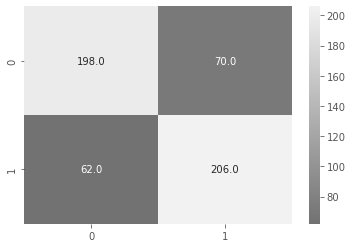

In [160]:
scbc_CV = cross_validate(cbc1,sX_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(scbc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(scbc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(scbc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(scbc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
scbc_pred = cross_val_predict(cbc1,sX_resampled, y_resampled, cv=5)
scbc_conf = confusion_matrix(y_resampled, scbc_pred)
sns.heatmap(scbc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
scbc_CV

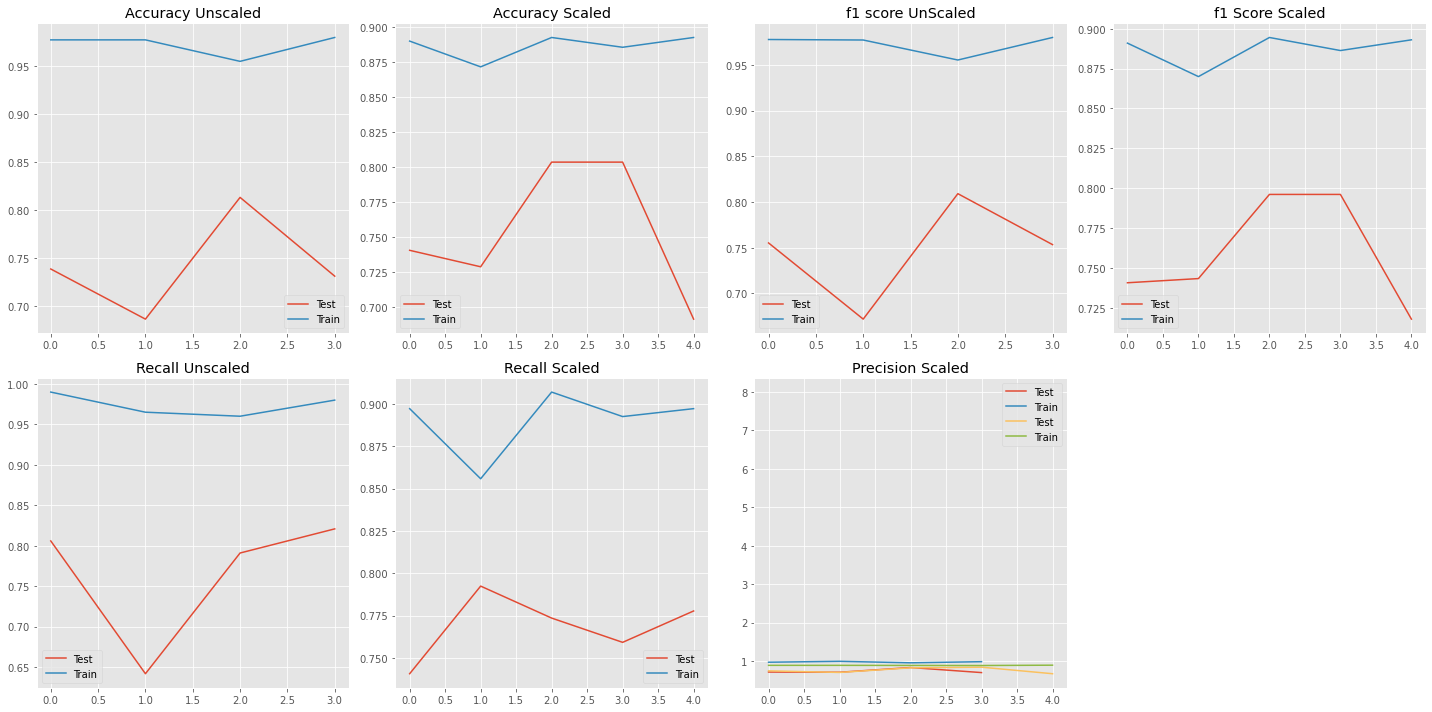

In [161]:
vizr(cbc_CV, scbc_CV)

## Gradient Boosting Clasifier

In [162]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.03)
sgbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=250)

## X set

  Mean accuracy score:  74.07
  Mean f1 score:        74.92
  Mean recall score:    77.23
  Mean precision score: 72.84


{'fit_time': array([0.28125167, 0.23438048, 0.23437715, 0.17186999, 0.2500031 ]),
 'score_time': array([0.03125143, 0.01562357, 0.        , 0.01562595, 0.015625  ]),
 'test_accuracy': array([0.74074074, 0.69158879, 0.79439252, 0.75700935, 0.71962617]),
 'train_accuracy': array([0.86682243, 0.86480186, 0.86247086, 0.86013986, 0.88344988]),
 'test_f1': array([0.75      , 0.7027027 , 0.79245283, 0.75925926, 0.74137931]),
 'train_f1': array([0.87133183, 0.86635945, 0.86621315, 0.86363636, 0.88687783]),
 'test_recall': array([0.77777778, 0.73584906, 0.79245283, 0.75925926, 0.7962963 ]),
 'train_recall': array([0.90186916, 0.8744186 , 0.88837209, 0.88785047, 0.91588785]),
 'test_precision': array([0.72413793, 0.67241379, 0.79245283, 0.75925926, 0.69354839]),
 'train_precision': array([0.84279476, 0.85844749, 0.84513274, 0.84070796, 0.85964912])}

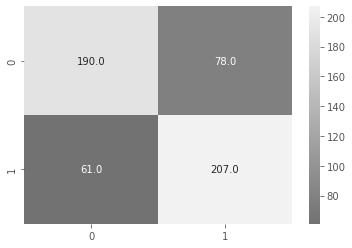

In [163]:
gbc_CV = cross_validate(gbc,X_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(gbc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(gbc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(gbc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(gbc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
gbc_pred = cross_val_predict(gbc,X_resampled, y_resampled, cv=5)
gbc_conf = confusion_matrix(y_resampled, gbc_pred)
sns.heatmap(gbc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
gbc_CV

## Scaled X set

  Mean accuracy score:  74.81
  Mean f1 score:        75.65
  Mean recall score:    77.98
  Mean precision score: 73.6


{'fit_time': array([0.51563573, 0.46875334, 0.42189574, 0.43749046, 0.51561546]),
 'score_time': array([0.01562381, 0.        , 0.        , 0.01563978, 0.        ]),
 'test_accuracy': array([0.75      , 0.70093458, 0.80373832, 0.75700935, 0.72897196]),
 'train_accuracy': array([0.85280374, 0.85547786, 0.84848485, 0.84615385, 0.87179487]),
 'test_f1': array([0.75675676, 0.71428571, 0.8       , 0.75925926, 0.75213675]),
 'train_f1': array([0.85714286, 0.85779817, 0.85260771, 0.85067873, 0.8758465 ]),
 'test_recall': array([0.77777778, 0.75471698, 0.79245283, 0.75925926, 0.81481481]),
 'train_recall': array([0.88317757, 0.86976744, 0.8744186 , 0.87850467, 0.90654206]),
 'test_precision': array([0.73684211, 0.6779661 , 0.80769231, 0.75925926, 0.6984127 ]),
 'train_precision': array([0.83259912, 0.84615385, 0.83185841, 0.8245614 , 0.84716157])}

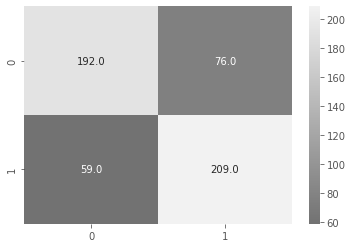

In [164]:
sgbc_CV = cross_validate(sgbc,sX_resampled,y_resampled,cv=5,scoring=['accuracy','f1','recall','precision'],return_train_score=True)

print('  Mean accuracy score: ',round(sgbc_CV['test_accuracy'].mean()*100,ndigits=2))
print('  Mean f1 score:       ',round(sgbc_CV['test_f1'].mean()*100,ndigits=2))
print('  Mean recall score:   ',round(sgbc_CV['test_recall'].mean()*100,ndigits=2))
print('  Mean precision score:',round(sgbc_CV['test_precision'].mean()*100,ndigits=2))
# Confusion matrix
sgbc_pred = cross_val_predict(sgbc,sX_resampled, y_resampled, cv=5)
sgbc_conf = confusion_matrix(y_resampled, sgbc_pred)
sns.heatmap(sgbc_conf,cmap='binary_r',annot=True,fmt='.1f',alpha=0.5)
sgbc_CV

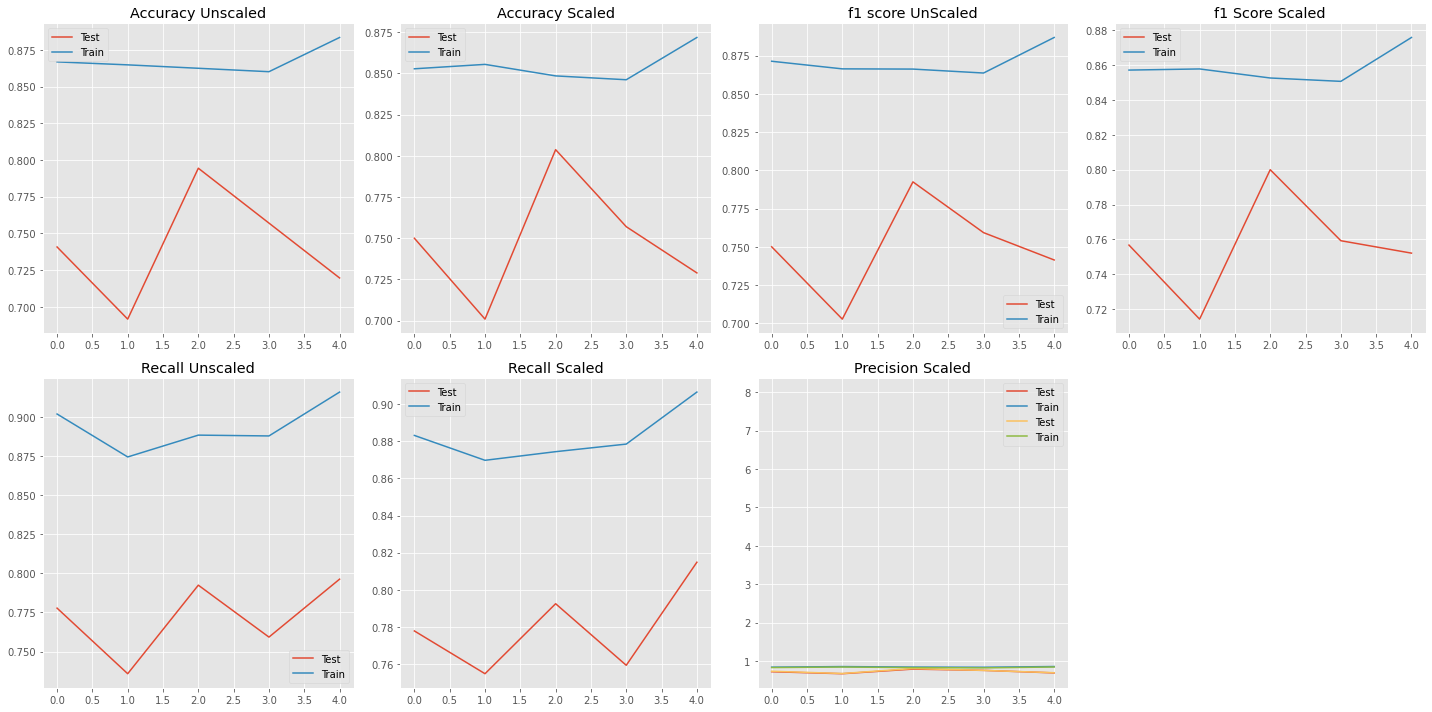

In [165]:
vizr(gbc_CV, sgbc_CV)

# ANN

In [166]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'

In [167]:
!pip install tensorflow

In [168]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                   y_resampled, test_size=0.3, random_state=631)

In [170]:
X_train = mmscalar.fit_transform(X_train)
X_test = mmscalar.transform(X_test)

In [172]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (375, 8)
X_test:  (161, 8)
y_train:  (375,)
y_test:  (161,)


## Initializing the ANN

In [173]:
ann = tf.keras.models.Sequential()

## Adding input and first hidden layer

In [174]:
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
# THIRD layer
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
# FOURTH layer
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
# FIFTH layer
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4, activation='relu'))

## Adding output layer

In [176]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

In [177]:
# optimizer 'adam' is stochastic gradient descent optimizer, loss for binary classification problems should always be binary_crossentropy,
# for non-binary: categorical_crossentropy

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [178]:
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
12/12 [==============================] - 2s 6ms/step - loss: 0.6936 - accuracy: 0.5147
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5147
Epoch 3/100
12/12 [==============================] - 0s 6ms/step - loss: 0.6910 - accuracy: 0.5147
Epoch 4/100
12/12 [==============================] - 0s 7ms/step - loss: 0.6900 - accuracy: 0.5147
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.5147
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6850 - accuracy: 0.5147
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6819 - accuracy: 0.5147
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6754 - accuracy: 0.5147
Epoch 9/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6692 - accuracy: 0.5147
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.5413
Epoch 11/

12/12 [==============================] - 0s 4ms/step - loss: 0.5137 - accuracy: 0.7573
Epoch 84/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5152 - accuracy: 0.7493
Epoch 85/100
12/12 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.7493
Epoch 86/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5138 - accuracy: 0.7653
Epoch 87/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5120 - accuracy: 0.7787
Epoch 88/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5104 - accuracy: 0.7760
Epoch 89/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5109 - accuracy: 0.7627
Epoch 90/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5091 - accuracy: 0.7707
Epoch 91/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5152 - accuracy: 0.7547
Epoch 92/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5289 - accuracy: 0.7573
Epoch 93/100


In [179]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 8)                 136       
                                                                 
 dense_6 (Dense)             (None, 4)                 3

In [180]:
y_pred = ann.predict(X_test)
y_pred = y_pred > 0.35

6/6 [==============================] - 0s 3ms/step


In [181]:
y_pred = y_pred.astype('int')

In [182]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

precision score 0.93
recall score 0.714
f1 score 0.808
accuracy score 0.764


<AxesSubplot:>

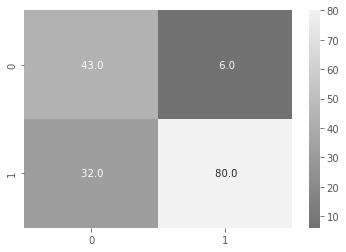

In [183]:
print('precision score',round(precision_score(y_pred,y_test),ndigits=3))
print('recall score',round(recall_score(y_pred,y_test),ndigits=3))
print('f1 score',round(f1_score(y_pred, y_test),ndigits=3))
print('accuracy score',round(accuracy_score(y_pred,y_test),ndigits=3))

conf = confusion_matrix(y_pred, y_test)
sns.heatmap(conf, cmap='binary_r',annot=True, fmt=' .1f', alpha=0.5)

**As we didn't cross_validate with ANN, we will run it for 10 times with different random states to change the data for training and testing**

In [184]:
precision_list = []
recall_list = []
f1_list = []
accuracy_list = []

for i in range(0, 10, 1):
    X_train, X_test, y_train, y_test = train_test_split(sX_resampled,y_resampled,test_size=0.3, random_state=i)
    sX_train = mmscalar.fit_transform(X_train)
    sX_test = mmscalar.transform(X_test)
    ann = tf.keras.models.Sequential()
    
    # THIRD layer
    ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
    # THIRD layer
    ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
    # FOURTH layer
    ann.add(tf.keras.layers.Dense(units=32, activation='relu'))
    # FIFTH layer
    ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
    ann.add(tf.keras.layers.Dense(units=4, activation='relu'))
    
    # OUTPUT layer
    ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
    
    ann.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')
    ann.fit(sX_train, y_train, batch_size=32, epochs=100, verbose=0)
    
    y_pred = ann.predict(sX_test)
    y_pred = y_pred > 0.35
    
    print('Random state', i)
    print('precision scorer', round(precision_score(y_pred, y_test),ndigits=3))
    precision_list.append(precision_score(y_pred, y_test))
    
    print('recall score', round(recall_score(y_pred, y_test), ndigits=3))
    recall_list.append(round(recall_score(y_pred,y_test),ndigits=3))
    
    print('f1 score',round(f1_score(y_pred, y_test), ndigits=3))
    f1_list.append(round(f1_score(y_pred, y_test), ndigits=3))
    
    print('accuracy score',round(accuracy_score(y_pred,y_test),ndigits=3), '\n')
    accuracy_list.append(round(accuracy_score(y_pred,y_test),ndigits=3))

6/6 [==============================] - 0s 3ms/step
Random state 0
precision scorer 0.854
recall score 0.707
f1 score 0.773
accuracy score 0.745 

6/6 [==============================] - 0s 5ms/step
Random state 1
precision scorer 0.828
recall score 0.735
f1 score 0.778
accuracy score 0.745 

6/6 [==============================] - 0s 4ms/step
Random state 2
precision scorer 0.753
recall score 0.656
f1 score 0.701
accuracy score 0.677 

6/6 [==============================] - 0s 4ms/step
Random state 3
precision scorer 0.922
recall score 0.664
f1 score 0.772
accuracy score 0.739 

6/6 [==============================] - 0s 2ms/step
Random state 4
precision scorer 0.827
recall score 0.691
f1 score 0.753
accuracy score 0.727 

6/6 [==============================] - 0s 3ms/step
Random state 5
precision scorer 0.882
recall score 0.719
f1 score 0.792
accuracy score 0.733 

6/6 [==============================] - 0s 4ms/step
Random state 6
precision scorer 0.79
recall score 0.681
f1 score 0.731
ac

In [185]:
ann_precision_score = np.array(precision_list)
ann_recall_score = np.array(recall_list)
ann_f1_score = np.array(f1_list)
ann_accuracy_score = np.array(accuracy_list)

In [186]:
print('Mean accuracy ANN : ',round(ann_accuracy_score.mean(), ndigits=3))
print('Mean f1 ANN : ', round(ann_f1_score.mean(),ndigits=3))
print('Mean precision ANN : ', round(ann_precision_score.mean(),ndigits=3))
print('Mean recall ANN : ', round(ann_recall_score.mean(), ndigits=3))

Mean accuracy ANN :  0.722
Mean f1 ANN :  0.753
Mean precision ANN :  0.836
Mean recall ANN :  0.688


In [187]:
ann_scores = {'test_accuracy': ann_accuracy_score,
             'test_recall': ann_recall_score,
             'test_f1': ann_f1_score,
             'test_precision': ann_precision_score}

### Mean scores of all models

**Defining a function for reproducibility**

In [188]:
def measures(scorer):
    """scorer takes in the scored metric from cross validate,enter the metric and enclose in quotes ,eg:('test_accuracy'), and shows the accuracy for all the models built"""
    accuracy_scores ={'KNN':knn_CV[scorer].mean()*100,'S_KNN':sknn_CV[scorer].mean()*100,
                   'LogReg':logreg_CV[scorer].mean()*100,'S_LogReg':slogreg_CV[scorer].mean()*100,
                   'Random Forests':rfc_CV[scorer].mean()*100,'S_Random Forests':srfc_CV[scorer].mean()*100,
                   'XGB':xgbc_CV[scorer].mean()*100,'S_XGB':sxgbc_CV[scorer].mean()*100,
                   'GNB':gnb_CV[scorer].mean()*100,'S_GNB':sgnb_CV[scorer].mean()*100,
                   'Catboost':cbc_CV[scorer].mean()*100,'S_Catboost':scbc_CV[scorer].mean()*100,
                   'Gradient Boosting':gbc_CV[scorer].mean()*100,'S_Gradient Boosting':sgbc_CV[scorer].mean()*100,
                   'ANN':ann_scores[scorer].mean()*100}
    
    plt.figure(figsize=(20,5))
    bar = plt.bar(accuracy_scores.keys(),accuracy_scores.values(),color=['orange','k'],alpha=0.65,width=0.4)
    plt.plot(accuracy_scores.values(),marker='o',linestyle='--',mfc='k',mec='k')
    plt.xticks(rotation=40,color='Red')
    if scorer == 'test_accuracy':
        plt.title('Accuracy scores',size=20)
    elif scorer == 'test_f1':
        plt.title('F1 scores',size=20)
    elif scorer == 'test_recall':
        plt.title('Recall scores',size=20)
    elif scorer == 'test_precision':
        plt.title('Precision scores',size=20)
    plt.tight_layout()
    plt.show()

In [189]:
scores = ['test_precision', 'test_f1','test_recall','test_accuracy']
help(measures)

Help on function measures in module __main__:

measures(scorer)
    scorer takes in the scored metric from cross validate,enter the metric and enclose in quotes ,eg:('test_accuracy'), and shows the accuracy for all the models built



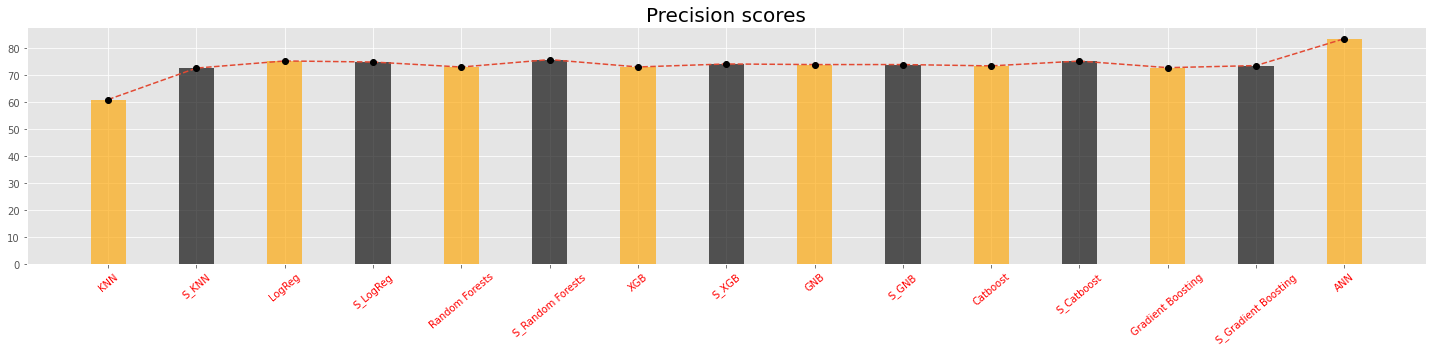

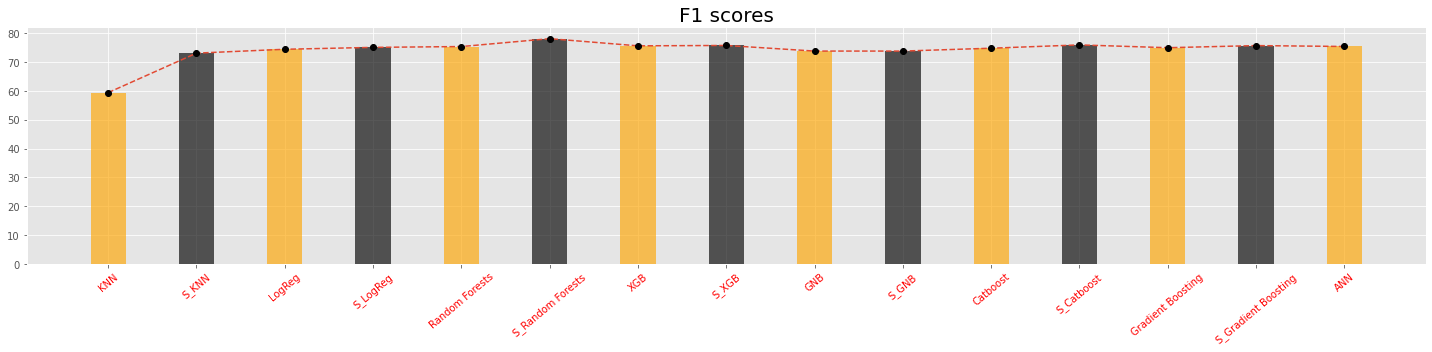

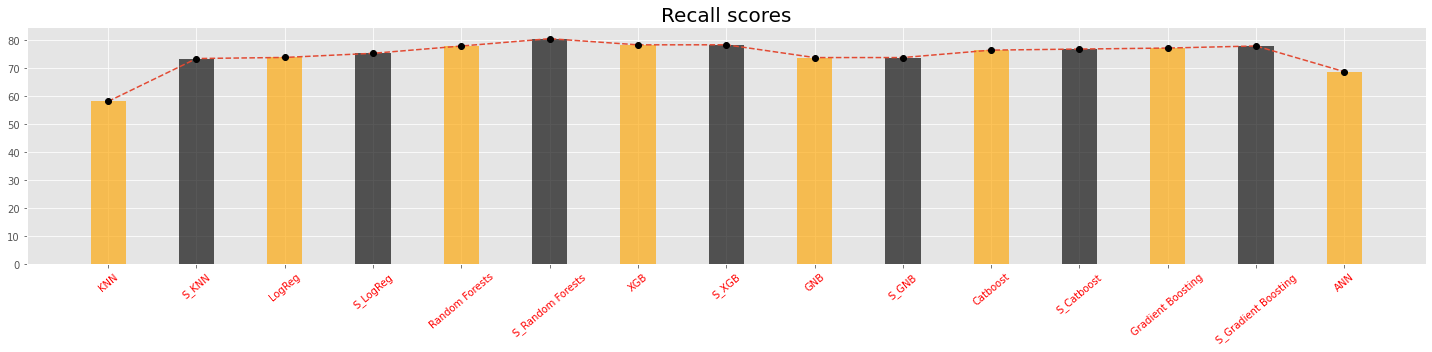

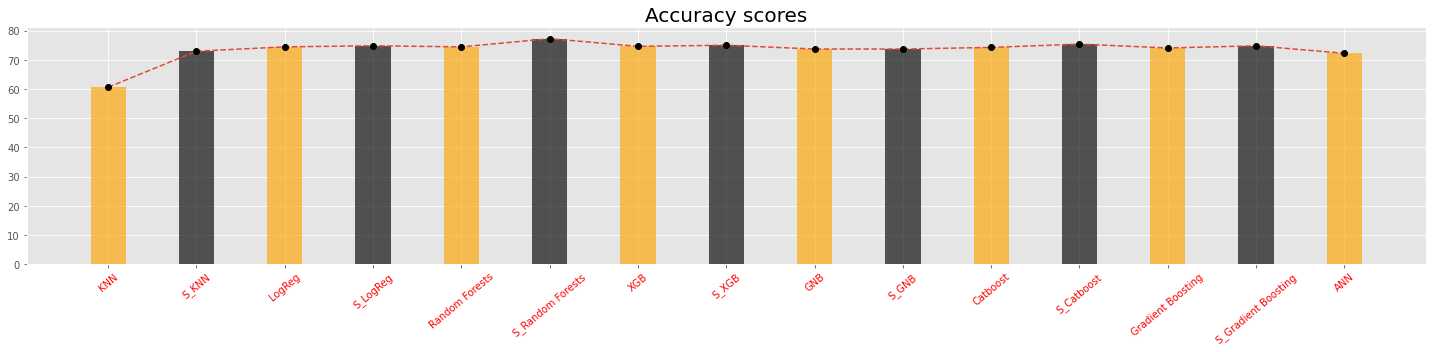

In [190]:
for score in scores:
    measures(score)

**Though we made two sets of data (scaled and unscaled), we did not fit a model with unscaled values for Neural Network (Neural Network recommends scaled values only)**

**Throughout all of the models ANN gave a high score among all metrics**

### Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

**Confusion matrix**

0  TP    FP

1  FN    TN

   0     1

In [ ]:
Sensitivity: (TP) / (TP + FN)
Specificity: (TN) / (TN + FP)
TPR: (TP) / (TP + FN)

## Importing metrics for AUC, classification report 

In [192]:
from sklearn.metrics import roc_curve, auc, classification_report

In [193]:
def aucp(prediction):
    fpr, tpr, thresholds = roc_curve(y_resampled, prediction)
    fig, ax = plt.subplot()
    ax.plot(fpr, tpr)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls='--', c='.3')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] == 12
    plt.title('ROC curve for diabetes classifier')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (sensitivity)')
    plt.grid(True)
    print('AUC score', auc(fpr, tpr), '\n')

### KNN AUC

0.6063432835820897


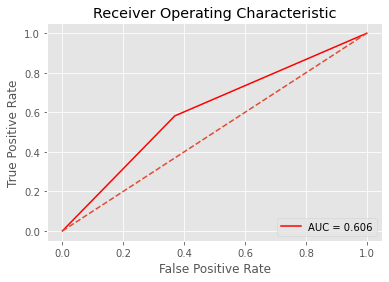

In [194]:
fpr, tpr, thresholds = roc_curve(y_resampled, knn_pred)
knn_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % knn_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
knn_auc = auc(fpr,tpr)
print(knn_auc)
plt.show()

### S_KNN AUC

0.7294776119402985


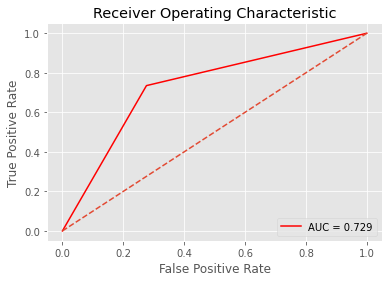

In [195]:
fpr, tpr, thresholds = roc_curve(y_resampled, sknn_pred)
sknn_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % sknn_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
sknn_auc = auc(fpr,tpr)
print(sknn_auc)
plt.show()

### LR AUC

0.7444029850746269


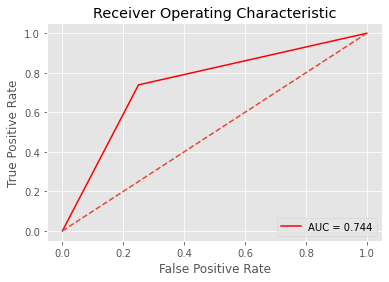

In [196]:
fpr, tpr, thresholds = roc_curve(y_resampled, lr_pred)
lr_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % lr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
lr_auc = auc(fpr,tpr)
print(lr_auc)
plt.show()

0.7481343283582089


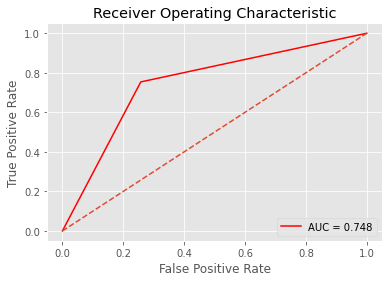

In [197]:
fpr, tpr, thresholds = roc_curve(y_resampled, slr_pred)
slr_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % slr_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
slr_auc = auc(fpr,tpr)
print(slr_auc)
plt.show()

0.7574626865671643


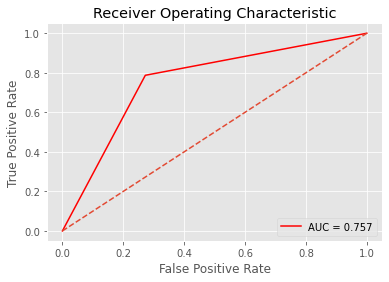

In [198]:
fpr, tpr, thresholds = roc_curve(y_resampled, rfc_pred)
rfc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % rfc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
rfc_auc = auc(fpr,tpr)
print(rfc_auc)
plt.show()

0.7686567164179103


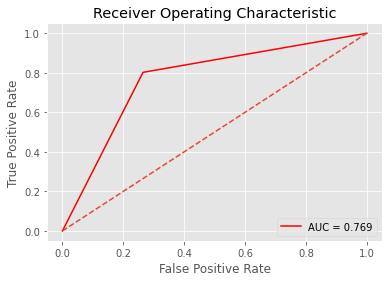

In [199]:
fpr, tpr, thresholds = roc_curve(y_resampled, srfc_pred)
srfc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % srfc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
srfc_auc = auc(fpr,tpr)
print(srfc_auc)
plt.show()

0.7462686567164178


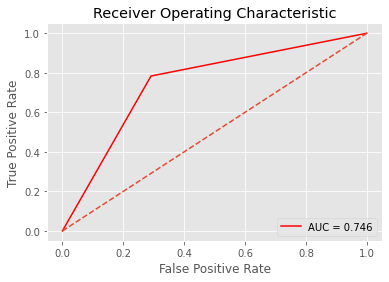

In [200]:
fpr, tpr, thresholds = roc_curve(y_resampled, xgb_pred)
xgb_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % xgb_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
xgb_auc = auc(fpr,tpr)
print(xgb_auc)
plt.show()

0.7462686567164178


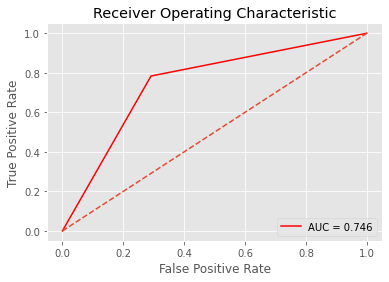

In [201]:
fpr, tpr, thresholds = roc_curve(y_resampled, sxgb_pred)
sxgb_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % sxgb_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
sxgb_auc = auc(fpr,tpr)
print(sxgb_auc)
plt.show()

0.7369402985074626


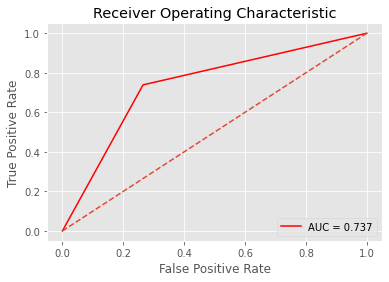

In [202]:
fpr, tpr, thresholds = roc_curve(y_resampled, gnb_pred)
gnb_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % gnb_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
gnb_auc = auc(fpr,tpr)
print(gnb_auc)
plt.show()

0.7369402985074626


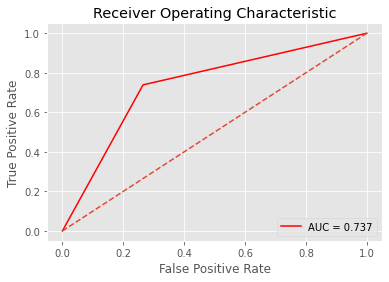

In [203]:
fpr, tpr, thresholds = roc_curve(y_resampled, sgnb_pred)
sgnb_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % sgnb_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
sgnb_auc = auc(fpr,tpr)
print(sgnb_auc)
plt.show()

0.7537313432835822


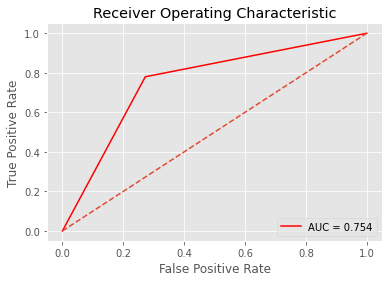

In [204]:
fpr, tpr, thresholds = roc_curve(y_resampled, cbc_pred)
cbc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % cbc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
cbc_auc = auc(fpr,tpr)
print(cbc_auc)
plt.show()

0.753731343283582


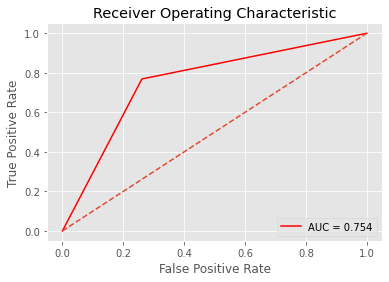

In [205]:
fpr, tpr, thresholds = roc_curve(y_resampled, scbc_pred)
scbc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % scbc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
scbc_auc = auc(fpr,tpr)
print(scbc_auc)
plt.show()

0.7406716417910447


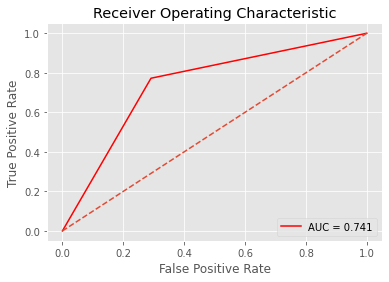

In [206]:
fpr, tpr, thresholds = roc_curve(y_resampled, gbc_pred)
gbc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % gbc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
gbc_auc = auc(fpr,tpr)
print(gbc_auc)
plt.show()

0.748134328358209


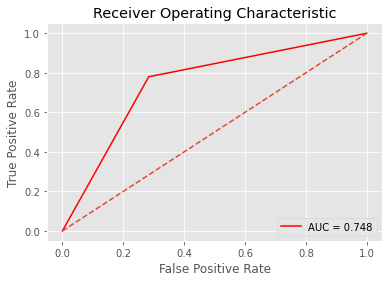

In [207]:
fpr, tpr, thresholds = roc_curve(y_resampled, sgbc_pred)
sgbc_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % sgbc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
sgbc_auc = auc(fpr,tpr)
print(sgbc_auc)
plt.show()

0.7331007751937985


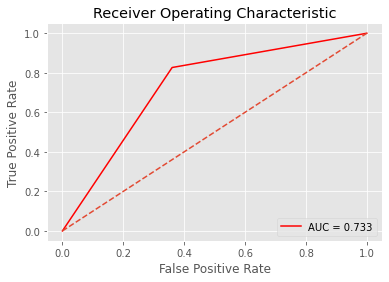

In [208]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
ann_auc = auc(fpr,tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, color='red',label = 'AUC = %0.3f' % ann_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
ann_auc = auc(fpr,tpr)
print(ann_auc)
plt.show()

AUC (Area Under Curve) metric

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

In [210]:
auc_scores = {'Models':['KNN','S_KNN','LogReg','S_LogReg','RFc','S_RFc','Xgbc','S_Xgbc','GNB','S_GNB','CBc','S_CBc','GBC','S_GBC','ANN'],
              'AUC score':[knn_auc,sknn_auc,lr_auc,slr_auc,rfc_auc,srfc_auc,xgb_auc,sxgb_auc,gnb_auc,sgnb_auc,cbc_auc,scbc_auc,gbc_auc,sgbc_auc,ann_auc]}

In [211]:
df_auc = pd.DataFrame(auc_scores)
df_auc.sort_values(by='AUC score',ascending=False,inplace=True)

## Sorted Descending values of AUC Score for all models

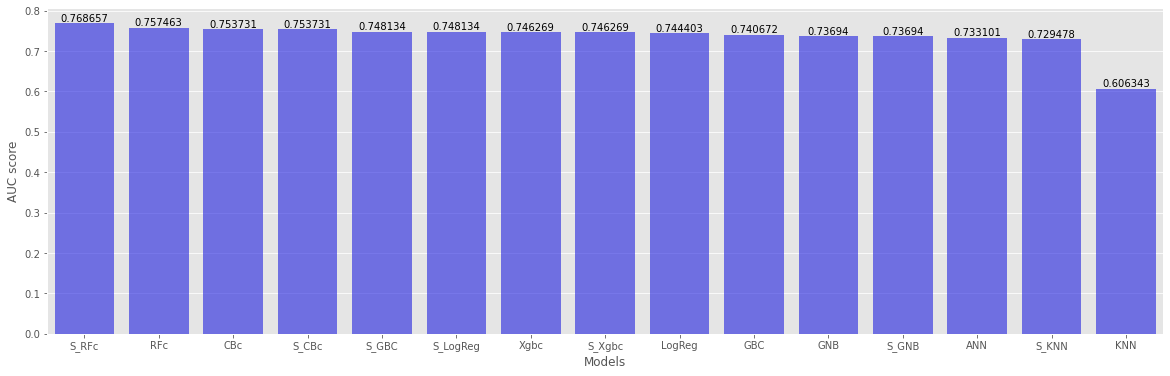

In [212]:
plt.figure(figsize=(20,6))
ax = sns.barplot(df_auc['Models'],df_auc['AUC score'],alpha=0.6, color='blue')
for i in ax.containers:
    ax.bar_label(i)

In [213]:
#predictions = [knn_pred,sknn_pred,lr_pred,slr_pred,rfc_pred,srfc_pred,xgb_pred,sxgb_pred,gnb_pred,sgnb_pred,cbc_pred,scbc_pred,gbc_pred,sgbc_pred]
#labels = ['knn_pred','sknn_pred','lr_pred','slr_pred','rfc_pred','srfc_pred','xgb_pred','sxgb_pred','gnb_pred','sgnb_pred','cbc_pred','scbc_pred','gbc_pred','sgbc_pred']

### Defining a function for getting a classification report of machine learning models

In [214]:
def clf_report(preds):
    print(classification_report(y_resampled,preds))

In [215]:
print('KNN')
clf_report(knn_pred)
print('S_KNN')
clf_report(sknn_pred)
print('LR')
clf_report(lr_pred)
print('S_LR')
clf_report(slr_pred)
print('RFc')
clf_report(rfc_pred)
print('S_RFc')
clf_report(srfc_pred)
print('XGB')
clf_report(xgb_pred)
print('S_XGB')
clf_report(sxgb_pred)
print('GNB')
clf_report(gnb_pred)
print('S_GNB')
clf_report(sgnb_pred)
print('CBc')
clf_report(cbc_pred)
print('S_CBc')
clf_report(scbc_pred)
print('GBc')
clf_report(gbc_pred)
print('SGBc')
clf_report(sgbc_pred)
print('ANN')
print(classification_report(y_test,y_pred))

KNN
              precision    recall  f1-score   support

           0       0.60      0.63      0.62       268
           1       0.61      0.58      0.60       268

    accuracy                           0.61       536
   macro avg       0.61      0.61      0.61       536
weighted avg       0.61      0.61      0.61       536

S_KNN
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       268
           1       0.73      0.74      0.73       268

    accuracy                           0.73       536
   macro avg       0.73      0.73      0.73       536
weighted avg       0.73      0.73      0.73       536

LR
              precision    recall  f1-score   support

           0       0.74      0.75      0.75       268
           1       0.75      0.74      0.74       268

    accuracy                           0.74       536
   macro avg       0.74      0.74      0.74       536
weighted avg       0.74      0.74      0.74       536

S_LR
 

In [216]:
df_auc

Models  AUC score
5      S_RFc   0.768657
4        RFc   0.757463
10       CBc   0.753731
11     S_CBc   0.753731
13     S_GBC   0.748134
3   S_LogReg   0.748134
6       Xgbc   0.746269
7     S_Xgbc   0.746269
2     LogReg   0.744403
12       GBC   0.740672
8        GNB   0.736940
9      S_GNB   0.736940
14       ANN   0.733101
1      S_KNN   0.729478
0        KNN   0.606343

### According to the AUC scores Catboost,ensemble models, gradient boosting models did well